In [25]:
!pip install --upgrade pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 325 kB 5.2 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 102 kB 57.6 MB/s 
     |████████████████████████████████| 696 kB 56.4 MB/s 
     |████████████████████████████████| 9.9 MB 47.1 MB/s 
     |████████████████████████████████| 4.7 MB 42.4 MB/s 
     |████████████████████████████████| 296 kB 62.4 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=6fb91dc1ffb9fb4ce54facc3e767d21774f931749d17dd6aa925278c6f39c70a
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
  Attempting uninstall: statsmodels
    Found e

In [ ]:
print('foi)')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import warnings
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pandas_profiling import ProfileReport
from sklearn.utils import shuffle
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
%matplotlib inline

## Leitura dos dados diários da torre K67

In [6]:
input_data = "/content/drive/MyDrive/K67_CfluxBF.txt"
df = pd.read_csv(input_data, header = 0, decimal = '.', sep = "\s+", na_values = -9999, skiprows = [1])
df.head()

dateloc  Year_LBAMIP  DoY_LBAMIP  Hour_LBAMIP  Tair_LBAMIP  \
0  731216.833333       2001.0       365.0         20.0          NaN   
1  731216.875000       2001.0       365.0         21.0          NaN   
2  731216.916667       2001.0       365.0         22.0   297.417751   
3  731216.958333       2001.0       365.0         23.0   297.100529   
4  731217.000000       2002.0         1.0          0.0   296.363586   

   Qair_LBAMIP  Wind_LBAMIP  Rainf_LBAMIP  PSurf_LBAMIP  SWdown_LBAMIP  ...  \
0          NaN          NaN           NaN           NaN            NaN  ...   
1          NaN          NaN           NaN           NaN            NaN  ...   
2     0.017530     2.235186      0.000000  97565.357292            0.0  ...   
3     0.017369     2.190482      0.000000  97566.748177            0.0  ...   
4     0.017379     2.485850      0.000551  97575.195312            0.0  ...   

   NEE_model  par_fill  Pc  Pc_GEPfill  Pc_AM  Pc_PM  Pcatmed.VPD  PcatlowVPD  \
0   9.777892       0.0 NaN         NaN    NaN    NaN          NaN         NaN   
1   9.777892       0.0 NaN         NaN    NaN    NaN          NaN         NaN   
2   9.777892       0.0 NaN         NaN    NaN    NaN          NaN         NaN   
3   9.777892       0.0 NaN         NaN    NaN    NaN          NaN         NaN   
4   9.157619       0.0 NaN         NaN    NaN    NaN          NaN         NaN   

   PcathighVPDvalues  VPD  
0                NaN  NaN  
1                NaN  NaN  
2                NaN  NaN  
3                NaN  NaN  
4                NaN  NaN  

[5 rows x 211 columns]

In [7]:
def JdToStD (jdate):
    fmt = '%Y%j'
    datestd = datetime.datetime.strptime(jdate, fmt).date()
    return(datestd)

def convData(data):
    data['Date'] = pd.DataFrame(np.zeros((len(data),1)))
    data['Day'] = pd.DataFrame(np.zeros((len(data),1)))
    data['Month'] = pd.DataFrame(np.zeros((len(data),1)))

    for i in range(len(data)):
        s = str(round(data['Year_LBAMIP'].loc[i]))+str(round(data['DoY_LBAMIP'].loc[i]))
        data['Date'].loc[i] = JdToStD(s)
        data['Month'].loc[i] = datetime.datetime.strptime(s,'%Y%j').month
        data['Day'].loc[i] = datetime.datetime.strptime(s,'%Y%j').day
        
    data['Date'] = pd.to_datetime(data['Date'].values)

In [8]:
convData(df)
df.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


dateloc  Year_LBAMIP  DoY_LBAMIP  Hour_LBAMIP  Tair_LBAMIP  \
0  731216.833333       2001.0       365.0         20.0          NaN   
1  731216.875000       2001.0       365.0         21.0          NaN   
2  731216.916667       2001.0       365.0         22.0   297.417751   
3  731216.958333       2001.0       365.0         23.0   297.100529   
4  731217.000000       2002.0         1.0          0.0   296.363586   

   Qair_LBAMIP  Wind_LBAMIP  Rainf_LBAMIP  PSurf_LBAMIP  SWdown_LBAMIP  ...  \
0          NaN          NaN           NaN           NaN            NaN  ...   
1          NaN          NaN           NaN           NaN            NaN  ...   
2     0.017530     2.235186      0.000000  97565.357292            0.0  ...   
3     0.017369     2.190482      0.000000  97566.748177            0.0  ...   
4     0.017379     2.485850      0.000551  97575.195312            0.0  ...   

   Pc_GEPfill  Pc_AM  Pc_PM  Pcatmed.VPD  PcatlowVPD  PcathighVPDvalues  VPD  \
0         NaN    NaN    NaN          NaN         NaN                NaN  NaN   
1         NaN    NaN    NaN          NaN         NaN                NaN  NaN   
2         NaN    NaN    NaN          NaN         NaN                NaN  NaN   
3         NaN    NaN    NaN          NaN         NaN                NaN  NaN   
4         NaN    NaN    NaN          NaN         NaN                NaN  NaN   

        Date   Day  Month  
0 2001-12-31  31.0   12.0  
1 2001-12-31  31.0   12.0  
2 2001-12-31  31.0   12.0  
3 2001-12-31  31.0   12.0  
4 2002-01-01   1.0    1.0  

[5 rows x 214 columns]

## Leitura de dados de satélite

In [9]:
input_data = "/content/drive/MyDrive/aod_mcd19a2.csv"
aod = pd.read_csv(input_data, header = 0, decimal = '.', sep = ',', index_col=0, na_values = 'NA')
aod.head()

d.data  d.AOD550
1  2002-01-02  0.232934
2  2002-01-03  0.252448
3  2002-01-04  0.171731
4  2002-01-05  0.291909
5  2002-01-06  0.167886

In [10]:
input_data = "/content/drive/MyDrive/lai_n16_avhc15c1_nc.csv"
lai = pd.read_csv(input_data, header = 0, decimal = '.', sep = ',', na_values='--')
lai.head()

Unnamed: 0  Mean LAI
0  2001-01-01  0.615252
1  2001-01-02  0.723438
2  2001-01-03  0.690313
3  2001-01-04  0.674521
4  2001-01-05  0.655573

In [11]:
aod.columns = ['Date', 'aod']
aod['Date'] = pd.to_datetime(aod['Date'].values)
aod.head()

Date       aod
1 2002-01-02  0.232934
2 2002-01-03  0.252448
3 2002-01-04  0.171731
4 2002-01-05  0.291909
5 2002-01-06  0.167886

In [12]:
lai.columns = ['Date', 'LAI']
lai['Date'] = pd.to_datetime(lai['Date'].values)
lai.head()

Date       LAI
0 2001-01-01  0.615252
1 2001-01-02  0.723438
2 2001-01-03  0.690313
3 2001-01-04  0.674521
4 2001-01-05  0.655573

In [13]:
df = df.merge(aod, 'left', left_on = 'Date', right_on = 'Date')
df = df.merge(lai, 'left', left_on = 'Date', right_on = 'Date')
df.head()

dateloc  Year_LBAMIP  DoY_LBAMIP  Hour_LBAMIP  Tair_LBAMIP  \
0  731216.833333       2001.0       365.0         20.0          NaN   
1  731216.875000       2001.0       365.0         21.0          NaN   
2  731216.916667       2001.0       365.0         22.0   297.417751   
3  731216.958333       2001.0       365.0         23.0   297.100529   
4  731217.000000       2002.0         1.0          0.0   296.363586   

   Qair_LBAMIP  Wind_LBAMIP  Rainf_LBAMIP  PSurf_LBAMIP  SWdown_LBAMIP  ...  \
0          NaN          NaN           NaN           NaN            NaN  ...   
1          NaN          NaN           NaN           NaN            NaN  ...   
2     0.017530     2.235186      0.000000  97565.357292            0.0  ...   
3     0.017369     2.190482      0.000000  97566.748177            0.0  ...   
4     0.017379     2.485850      0.000551  97575.195312            0.0  ...   

   Pc_PM  Pcatmed.VPD  PcatlowVPD  PcathighVPDvalues  VPD       Date   Day  \
0    NaN          NaN         NaN                NaN  NaN 2001-12-31  31.0   
1    NaN          NaN         NaN                NaN  NaN 2001-12-31  31.0   
2    NaN          NaN         NaN                NaN  NaN 2001-12-31  31.0   
3    NaN          NaN         NaN                NaN  NaN 2001-12-31  31.0   
4    NaN          NaN         NaN                NaN  NaN 2002-01-01   1.0   

   Month  aod       LAI  
0   12.0  NaN  0.591731  
1   12.0  NaN  0.591731  
2   12.0  NaN  0.591731  
3   12.0  NaN  0.591731  
4    1.0  NaN  0.627599  

[5 rows x 216 columns]

## Processamento de dados horários da torre K67

In [14]:
input_data = "/content/drive/MyDrive/K67_CfluxBF.txt"
dh = pd.read_csv(input_data, header = 0, decimal = '.', sep = "\s+", na_values = -9999, skiprows = [1])
dh.head()

dateloc  Year_LBAMIP  DoY_LBAMIP  Hour_LBAMIP  Tair_LBAMIP  \
0  731216.833333       2001.0       365.0         20.0          NaN   
1  731216.875000       2001.0       365.0         21.0          NaN   
2  731216.916667       2001.0       365.0         22.0   297.417751   
3  731216.958333       2001.0       365.0         23.0   297.100529   
4  731217.000000       2002.0         1.0          0.0   296.363586   

   Qair_LBAMIP  Wind_LBAMIP  Rainf_LBAMIP  PSurf_LBAMIP  SWdown_LBAMIP  ...  \
0          NaN          NaN           NaN           NaN            NaN  ...   
1          NaN          NaN           NaN           NaN            NaN  ...   
2     0.017530     2.235186      0.000000  97565.357292            0.0  ...   
3     0.017369     2.190482      0.000000  97566.748177            0.0  ...   
4     0.017379     2.485850      0.000551  97575.195312            0.0  ...   

   NEE_model  par_fill  Pc  Pc_GEPfill  Pc_AM  Pc_PM  Pcatmed.VPD  PcatlowVPD  \
0   9.777892       0.0 NaN         NaN    NaN    NaN          NaN         NaN   
1   9.777892       0.0 NaN         NaN    NaN    NaN          NaN         NaN   
2   9.777892       0.0 NaN         NaN    NaN    NaN          NaN         NaN   
3   9.777892       0.0 NaN         NaN    NaN    NaN          NaN         NaN   
4   9.157619       0.0 NaN         NaN    NaN    NaN          NaN         NaN   

   PcathighVPDvalues  VPD  
0                NaN  NaN  
1                NaN  NaN  
2                NaN  NaN  
3                NaN  NaN  
4                NaN  NaN  

[5 rows x 211 columns]

In [15]:
convData(dh)
dh.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


dateloc  Year_LBAMIP  DoY_LBAMIP  Hour_LBAMIP  Tair_LBAMIP  \
0  731216.833333       2001.0       365.0         20.0          NaN   
1  731216.875000       2001.0       365.0         21.0          NaN   
2  731216.916667       2001.0       365.0         22.0   297.417751   
3  731216.958333       2001.0       365.0         23.0   297.100529   
4  731217.000000       2002.0         1.0          0.0   296.363586   

   Qair_LBAMIP  Wind_LBAMIP  Rainf_LBAMIP  PSurf_LBAMIP  SWdown_LBAMIP  ...  \
0          NaN          NaN           NaN           NaN            NaN  ...   
1          NaN          NaN           NaN           NaN            NaN  ...   
2     0.017530     2.235186      0.000000  97565.357292            0.0  ...   
3     0.017369     2.190482      0.000000  97566.748177            0.0  ...   
4     0.017379     2.485850      0.000551  97575.195312            0.0  ...   

   Pc_GEPfill  Pc_AM  Pc_PM  Pcatmed.VPD  PcatlowVPD  PcathighVPDvalues  VPD  \
0         NaN    NaN    NaN          NaN         NaN                NaN  NaN   
1         NaN    NaN    NaN          NaN         NaN                NaN  NaN   
2         NaN    NaN    NaN          NaN         NaN                NaN  NaN   
3         NaN    NaN    NaN          NaN         NaN                NaN  NaN   
4         NaN    NaN    NaN          NaN         NaN                NaN  NaN   

        Date   Day  Month  
0 2001-12-31  31.0   12.0  
1 2001-12-31  31.0   12.0  
2 2001-12-31  31.0   12.0  
3 2001-12-31  31.0   12.0  
4 2002-01-01   1.0    1.0  

[5 rows x 214 columns]

In [16]:
p_acum = dh[['Date', 'prec']].groupby('Date').sum().rename(columns = {'prec':'prec acumulado'})
p_acum.head()

prec acumulado
Date                      
2001-12-31             0.0
2002-01-01             0.0
2002-01-02             0.0
2002-01-03            25.4
2002-01-04             0.0

In [17]:
df = df.merge(p_acum, 'left', left_on = 'Date', right_index = True)

In [18]:
df = df[['Date', 'ta', 'press', 'par', 'Rn', 'ws', 'H', 'LE','rh', 'h2o', 'Fh2o', 'ee', 'ees', 'So','NEEnogap_5day_sco2_ust', 'prec', 'prec acumulado', 'aod', 'LAI']]

## Análise

In [ ]:
df.shape[0]/365

4.005479452054795

In [19]:
df = shuffle(df, random_state = 10)
df.head()

Date      ta    press      par     Rn     ws        H       LE  \
32938 2005-10-05  23.551  97.4898  197.268  123.7  3.285    2.394   30.879   
29767 2005-05-26  22.300  97.3938   -4.994    NaN  2.164   -5.723      NaN   
32496 2005-09-16  26.721  97.5786   -2.703  -24.5  2.914   -9.715   22.841   
22436 2004-07-24  28.660  97.5051  356.958  136.0  2.324   10.893      NaN   
19117 2004-03-08  25.697  97.9473  877.852  418.6  2.276  104.144  284.535   

            rh     h2o   Fh2o        ee     ees          So  \
32938  96.8071  16.373  0.702  2.968009  3.0659    6.614371   
29767  95.6931     NaN    NaN  2.769741  2.8944    0.000000   
32496  78.5154  15.895  0.521  2.964663  3.7759    0.000000   
22436  71.3858     NaN    NaN  2.904688  4.0690  603.307358   
19117  85.6092  16.305  6.477  2.901981  3.3898  982.220186   

       NEEnogap_5day_sco2_ust  prec  prec acumulado       aod       LAI  
32938               -6.064000   0.0           0.000  0.235789  0.642426  
29767                8.114061   0.0           0.254  0.134304  1.140419  
32496                7.557208   0.0           0.000  1.488782  0.710990  
22436               -2.541000   0.0           0.000  0.125775  1.282782  
19117              -24.852000   0.0           2.794  0.217466  0.603524

In [20]:
train = df.iloc[:-round(df.shape[0]*0.1),:]
test = df.iloc[-round(df.shape[0]*0.1):,:]

In [23]:
profile = ProfileReport(train, title="Pandas Profiling Report")

TypeError: ignored

In [ ]:
train.columns

In [ ]:
metadata = {
    'Date':'Date of the measure', 
    'ta':'Temperaturure (Celsius)', 
    'press':'Pressure', 
    'par':'Photosynthetically Active Radiation', 
    'Rn':'Net Radiation', 
    'ws':'Wind Speed', 
    'H':'Sensible heat flux corrected for air heat capacity that can change with humidity', 
    'LE':'Latent heat flux corrected for air heat capacity that can change with humidity', 
    'rh':'Relative humidity', 
    'h2o':'H2O concentration IRGA',
    'Fh2o':'Rate of vertical transfer of H2O (mmol/m2/s)', 
    'ee':'Vapor pressure', 
    'ees':'Saturation vapor pressure', 
    'So':'Top of the Atmosphere radiation', 
    'NEEnogap_5day_sco2_ust':'NEE: net ecosystem exchange NEE filled ustar corrected', 
    'prec':'Precipitation',
    'prec acumulado':'Precipitation (hour)', 
    'aod':'Aerossol optical depth', 
    'LAI':'Leaf Area Index'
}

In [ ]:
profile.to_widgets()

In [ ]:
train.head()

Date         ta      press         par          Rn        ws  \
855 2004-05-04  25.160417  97.579804  297.215958  130.568750  2.299962   
381 2003-01-16  26.271417  97.620146  368.249708  135.560417  3.305682   
721 2003-12-22  24.950522  97.433821  341.673417  130.594792  3.028667   
577 2003-07-31  25.938708  97.722537  389.513583   92.587500  3.066454   
35  2002-02-04  26.081304  97.634412  535.270583         NaN  3.305604   

             H          LE         rh        h2o         Fh2o        ee  \
855  18.595667         NaN  93.182042        NaN          NaN  3.084329   
381  21.286250   85.544750  75.800296  15.573792     1.950708  2.627885   
721   9.994896   80.385083        NaN  16.083375  -415.064875       NaN   
577  24.866833  106.400625  82.178854  15.861125     2.426708  2.844955   
35   25.365679         NaN  78.797461  17.932597 -2914.426375  2.700032   

          ees          So  NEEnogap_5day_sco2_ust    prec  prec acumulado  \
855  3.324496  400.794615                0.363318  0.1270           3.048   
381  3.523296  430.751171               -0.064632  0.0000           0.000   
721  3.377138  425.445410                1.407808  0.0635           1.524   
577  3.498562  390.518107                0.646833  0.0000           0.000   
35   3.461342  437.261633                2.301349  0.0000           0.000   

          aod       LAI  
855  0.123771  1.006994  
381  0.237433  0.764556  
721  0.239129  0.617596  
577  0.204137  1.211760  
35   0.095773  0.621415

In [ ]:
ss = StandardScaler()

In [ ]:
train.columns

Index(['Date', 'ta', 'press', 'par', 'Rn', 'ws', 'H', 'LE', 'rh', 'h2o',
       'Fh2o', 'ee', 'ees', 'So', 'NEEnogap_5day_sco2_ust', 'prec',
       'prec acumulado', 'aod', 'LAI'],
      dtype='object')

In [ ]:
ss.fit(train[['ta', 'press', 'par', 'Rn', 'ws', 'H', 'LE', 'rh', 'h2o',
       'Fh2o', 'ee', 'ees', 'So', 'NEEnogap_5day_sco2_ust', 'prec',
       'prec acumulado', 'aod', 'LAI']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
train_sc = pd.DataFrame(
    ss.transform(
        train[['ta', 'press', 'par', 'Rn', 'ws', 'H', 'LE', 'rh', 'h2o', 'Fh2o', 'ee', 'ees', 'So', 'NEEnogap_5day_sco2_ust', 
               'prec','prec acumulado', 'aod', 'LAI']]
    ), 
    index = train['Date'].values, 
    columns = train.columns[1:]
).reset_index().rename(columns={'index':'Date'})

In [ ]:
train_sc.sort_values('Date', inplace=True)

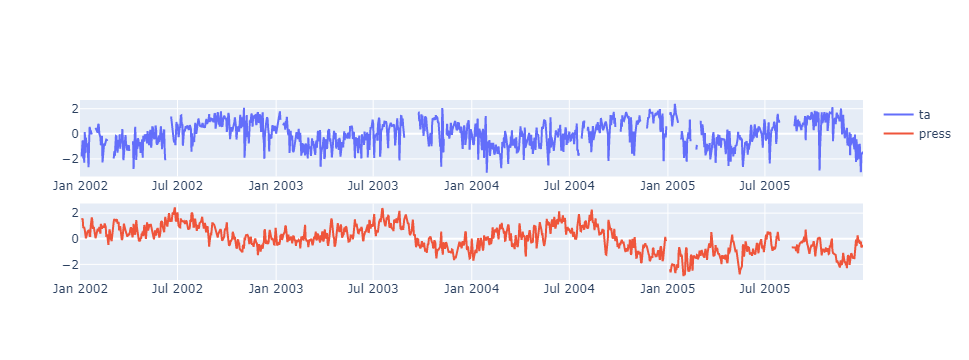

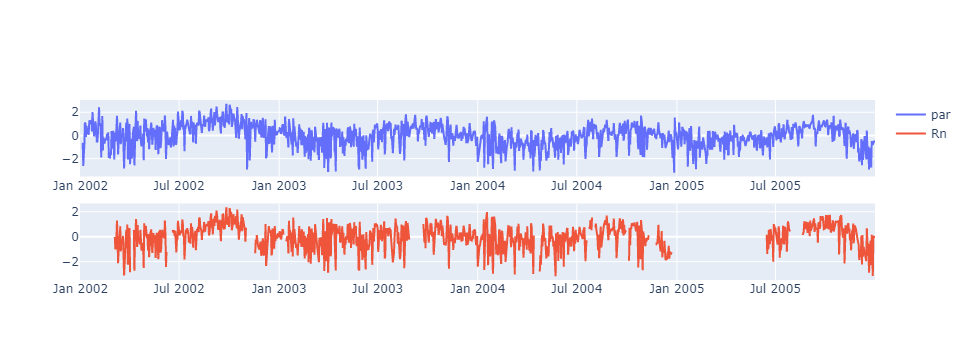

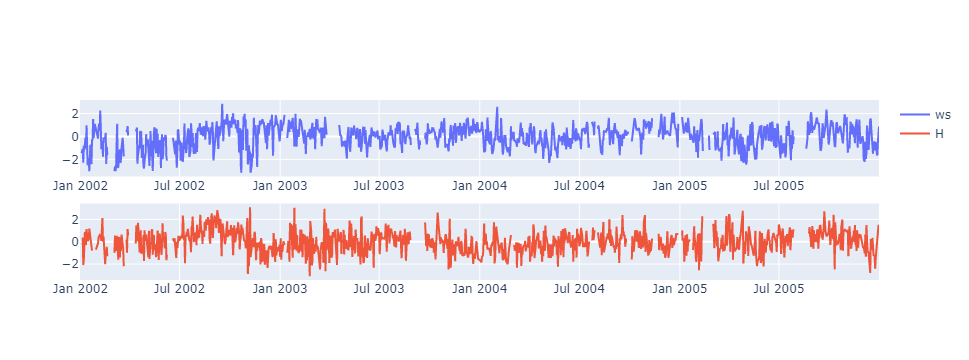

In [ ]:
# Create figure with secondary y-axis
fig = make_subplots(rows=2, cols=1)

# Add traces
fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['ta'], name = 'ta'), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['press'], name = 'press'),
              row=2, col=1)

fig.show()

# Create figure with secondary y-axis
fig = make_subplots(rows=2, cols=1)

# Add traces
fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['par'], name = 'par'), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['Rn'], name = 'Rn'),
              row=2, col=1)

fig.show()

# Create figure with secondary y-axis
fig = make_subplots(rows=2, cols=1)

# Add traces
fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['ws'], name = 'ws'), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['H'], name = 'H'),
              row=2, col=1)

fig.show()

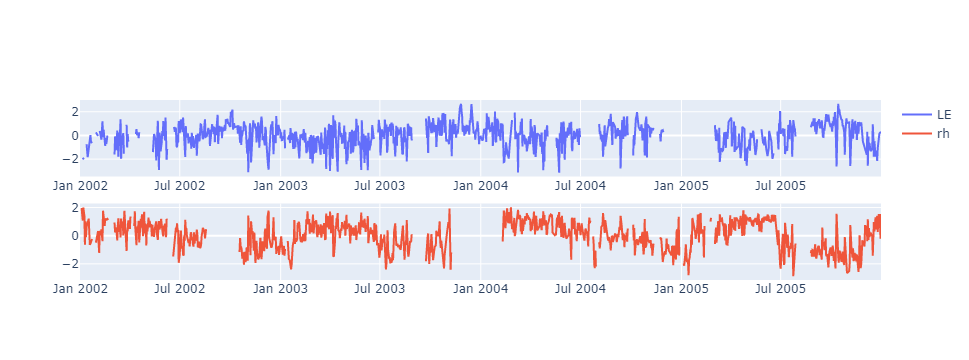

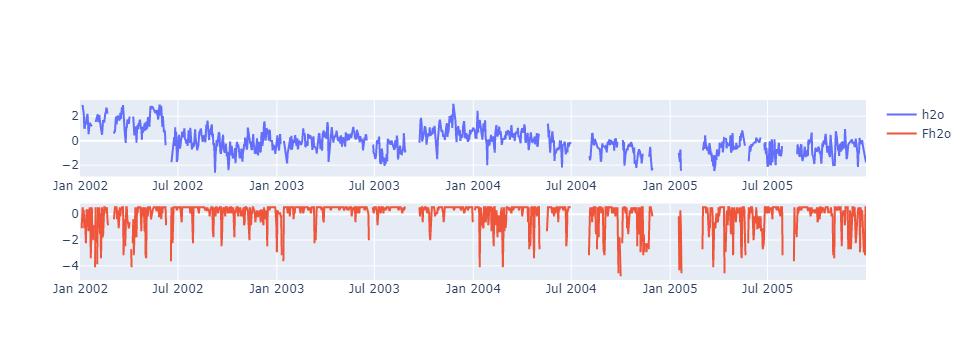

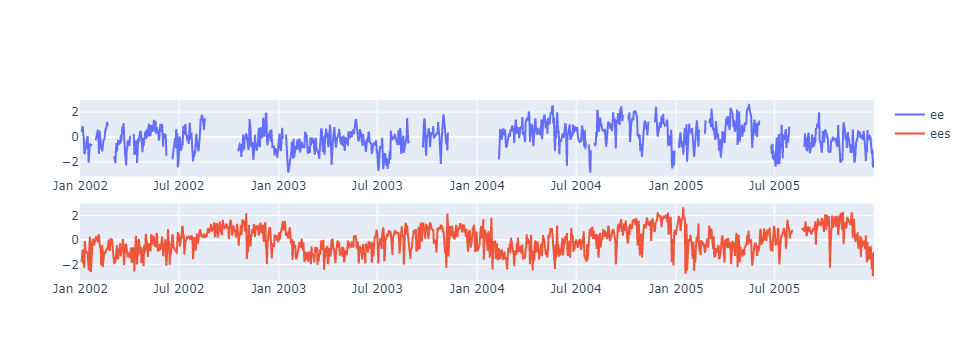

In [ ]:
# Create figure with secondary y-axis
fig = make_subplots(rows=2, cols=1)

# Add traces
fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['LE'], name = 'LE'), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['rh'], name = 'rh'),
              row=2, col=1)

fig.show()

# Create figure with secondary y-axis
fig = make_subplots(rows=2, cols=1)

# Add traces
fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['h2o'], name = 'h2o'), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['Fh2o'], name = 'Fh2o'),
              row=2, col=1)

fig.show()

# Create figure with secondary y-axis
fig = make_subplots(rows=2, cols=1)

# Add traces
fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['ee'], name = 'ee'), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['ees'], name = 'ees'),
              row=2, col=1)

fig.show()

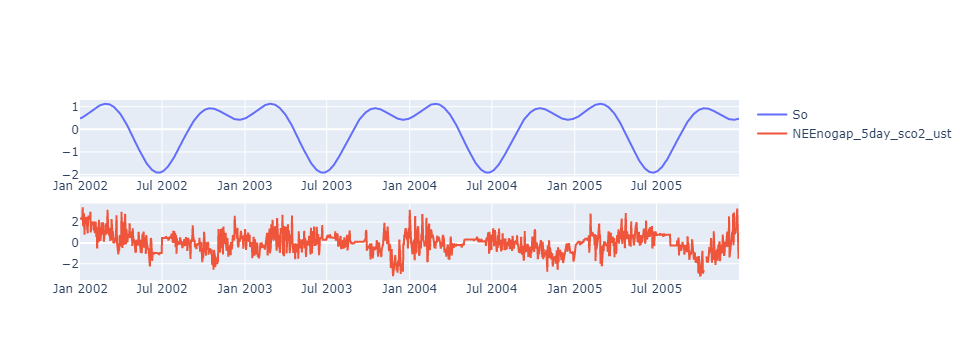

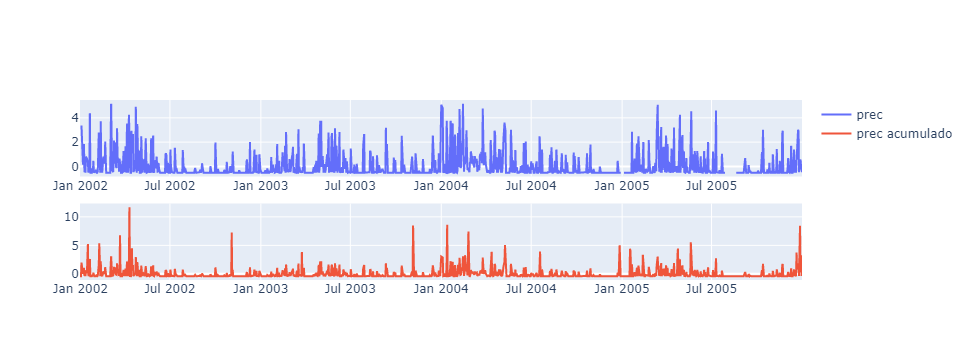

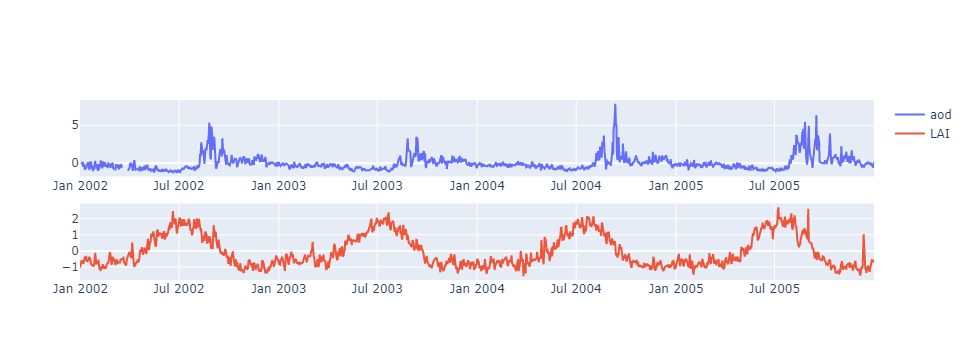

In [ ]:
# Create figure with secondary y-axis
fig = make_subplots(rows=2, cols=1)

# Add traces
fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['So'], name = 'So'), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['NEEnogap_5day_sco2_ust'], name = 'NEEnogap_5day_sco2_ust'),
              row=2, col=1)

fig.show()

# Create figure with secondary y-axis
fig = make_subplots(rows=2, cols=1)

# Add traces
fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['prec'], name = 'prec'), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['prec acumulado'], name = 'prec acumulado'),
              row=2, col=1)

fig.show()

# Create figure with secondary y-axis
fig = make_subplots(rows=2, cols=1)

# Add traces
fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['aod'], name = 'aod'), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['LAI'], name = 'LAI'),
              row=2, col=1)

fig.show()

In [ ]:
train_sc.isnull().mean().sort_values(ascending=False)

Rn                        0.246960
LE                        0.214286
ee                        0.212006
rh                        0.198328
h2o                       0.178571
Fh2o                      0.152736
H                         0.113222
ta                        0.102584
ws                        0.100304
prec                      0.021277
press                     0.021277
ees                       0.014438
aod                       0.011398
par                       0.003040
NEEnogap_5day_sco2_ust    0.002280
LAI                       0.000760
prec acumulado            0.000000
So                        0.000000
Date                      0.000000
dtype: float64

In [ ]:
train_sc = train_sc[~train_sc['NEEnogap_5day_sco2_ust'].isnull()]

In [ ]:
bfill_imputation = train_sc.fillna(method='bfill')

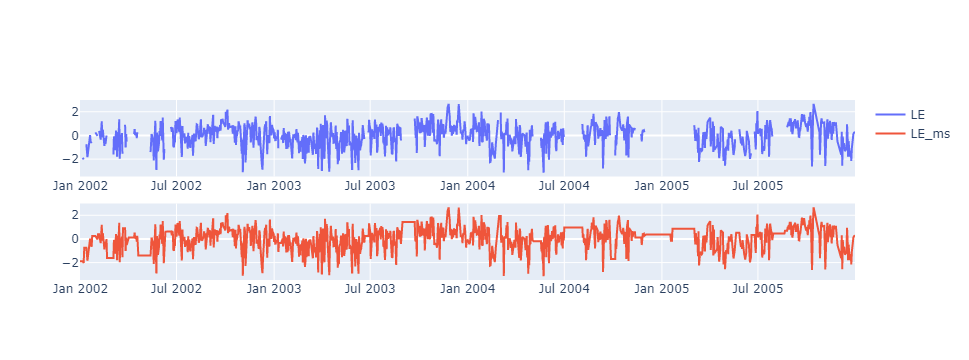

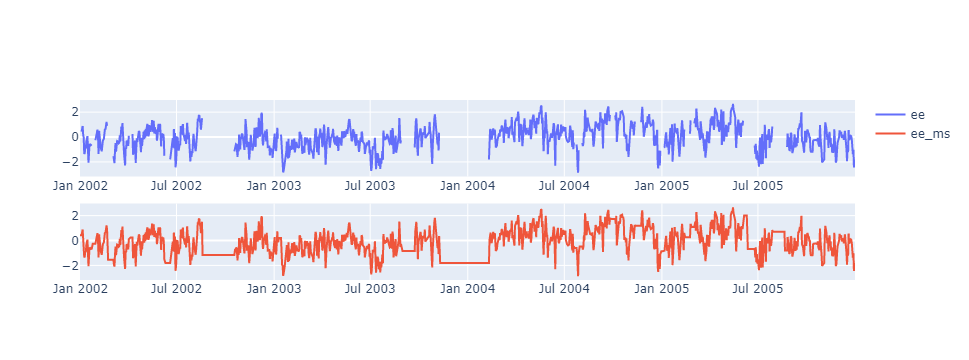

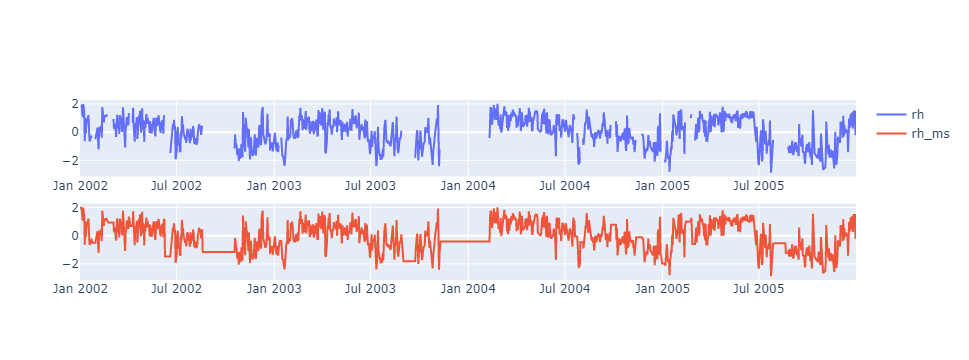

In [ ]:
# Create figure with secondary y-axis
fig = make_subplots(rows=2, cols=1)

# Add traces
fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['LE'], name = 'LE'), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=bfill_imputation['Date'], y=bfill_imputation['LE'], name = 'LE_ms'),
              row=2, col=1)

fig.show()

# Create figure with secondary y-axis
fig = make_subplots(rows=2, cols=1)

# Add traces
fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['ee'], name = 'ee'), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=bfill_imputation['Date'], y=bfill_imputation['ee'], name = 'ee_ms'),
              row=2, col=1)

fig.show()

# Create figure with secondary y-axis
fig = make_subplots(rows=2, cols=1)

# Add traces
fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['rh'], name = 'rh'), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=bfill_imputation['Date'], y=bfill_imputation['rh'], name = 'rh_ms'),
              row=2, col=1)

fig.show()


In [ ]:
knn = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean')
knn.fit(train_sc[['ta', 'press', 'par', 'Rn', 'ws', 'H', 'LE', 'rh', 'h2o', 'Fh2o', 'ee', 'ees', 'So', 
               'prec acumulado', 'aod', 'LAI']])

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=5, weights='uniform')

In [ ]:
train_sc.columns

Index(['Date', 'ta', 'press', 'par', 'Rn', 'ws', 'H', 'LE', 'rh', 'h2o',
       'Fh2o', 'ee', 'ees', 'So', 'NEEnogap_5day_sco2_ust', 'prec',
       'prec acumulado', 'aod', 'LAI'],
      dtype='object')

In [ ]:
knn_imputation = pd.DataFrame(
    knn.transform(
        train_sc[['ta', 'press', 'par', 'Rn', 'ws', 'H', 'LE', 'rh', 'h2o', 'Fh2o', 'ee', 'ees', 'So', 'prec', 'aod', 'LAI']]
    ), 
    index = train_sc['Date'].values, 
    columns = ['ta', 'press', 'par', 'Rn', 'ws', 'H', 'LE', 'rh', 'h2o', 'Fh2o', 'ee', 'ees', 'So', 'prec', 'aod', 'LAI']
).reset_index().rename(columns={'index':'Date'})

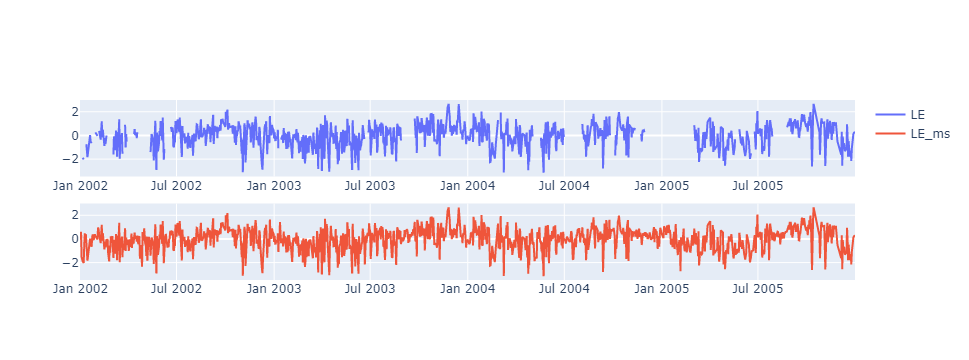

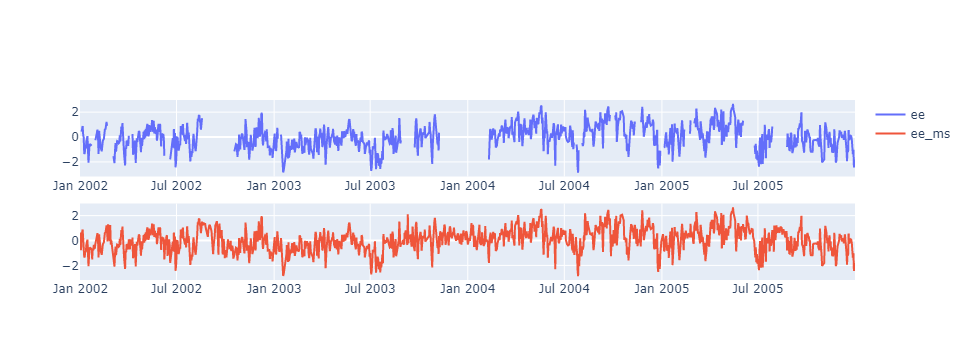

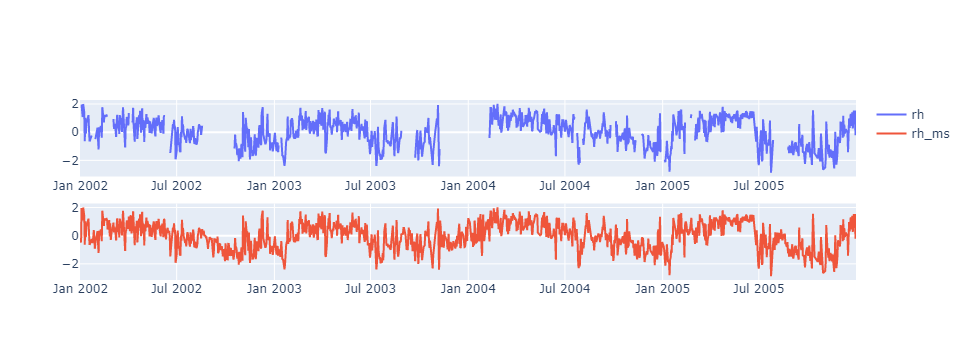

In [ ]:
# Create figure with secondary y-axis
fig = make_subplots(rows=2, cols=1)

# Add traces
fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['LE'], name = 'LE'), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=knn_imputation['Date'], y=knn_imputation['LE'], name = 'LE_ms'),
              row=2, col=1)

fig.show()

# Create figure with secondary y-axis
fig = make_subplots(rows=2, cols=1)

# Add traces
fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['ee'], name = 'ee'), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=knn_imputation['Date'], y=knn_imputation['ee'], name = 'ee_ms'),
              row=2, col=1)

fig.show()

# Create figure with secondary y-axis
fig = make_subplots(rows=2, cols=1)

# Add traces
fig.add_trace(go.Scatter(x=train_sc['Date'], y=train_sc['rh'], name = 'rh'), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=knn_imputation['Date'], y=knn_imputation['rh'], name = 'rh_ms'),
              row=2, col=1)

fig.show()


In [ ]:
knn_imputation.head()

Date        ta     press       par        Rn        ws         H  \
0 2001-12-31  0.644323 -1.223105  0.036968 -0.505257 -0.080281 -0.696202   
1 2002-01-01  0.232617 -0.509823 -0.050986 -0.106333  0.812562 -1.039396   
2 2002-01-02  0.082372 -0.386436  0.059731 -0.044029  1.056163 -0.820680   
3 2002-01-03 -1.798882  1.484604 -1.267459 -0.751009 -1.466813 -0.639718   
4 2002-01-05 -0.520297  1.568853 -0.637125 -0.830199 -1.070300  0.367880   

         LE        rh       h2o      Fh2o        ee       ees        So  \
0 -0.065097 -0.253109  0.342811  0.298630  0.307443  0.879493  0.482362   
1 -0.020962 -0.429383  0.660312  0.159633  0.642440  0.259116  0.482362   
2  0.601693 -0.479493  0.355228  0.484292 -0.781448  0.112282  0.491091   
3 -1.524533  1.959015  2.852370 -1.092920  0.431257 -1.792718  0.500361   
4 -1.888431  1.072208  2.840323  0.529975  0.883822 -0.786764  0.520457   

       prec       aod       LAI  
0 -0.402819  0.414735 -1.035705  
1  0.032643 -0.191092 -0.872464  
2 -0.402819 -0.135523 -0.804759  
3  3.368757 -0.035000 -0.581070  
4  0.259057  0.168276 -0.702314

In [ ]:
knn_imputation.drop(columns='Date').values

array([[ 0.64432292, -1.22310544,  0.03696839, ..., -0.40281914,
         0.41473517, -1.03570542],
       [ 0.23261712, -0.50982264, -0.05098639, ...,  0.03264254,
        -0.19109171, -0.87246391],
       [ 0.08237153, -0.38643599,  0.05973085, ..., -0.40281914,
        -0.1355233 , -0.8047592 ],
       ...,
       [-1.53812438, -0.54442186, -0.51806331, ...,  0.04526537,
        -0.5232538 , -0.67299498],
       [-1.43113096, -0.54487487, -0.51339998, ..., -0.47949644,
        -0.57296127, -0.5594447 ],
       [-1.43113096, -0.54487487, -0.51339998, ..., -0.47949644,
         0.16637618, -0.73658457]])

In [ ]:
knn_imputation.drop(columns='Date').values.shape

(1313, 16)

In [ ]:
train_sc['NEEnogap_5day_sco2_ust'].values

array([ 2.34755315,  2.34755315,  2.34755315, ..., -0.55984302,
       -1.41974086, -1.41974086])

In [ ]:
test.shape

(146, 19)

In [ ]:
test.dropna().shape

(73, 19)

In [ ]:
def create_model(trial, input_dim): 

    n_layers = trial.suggest_int("n_layers", 1, 5)
    dropout_rate = trial.suggest_float("lstm_dropout", 0.0, 0.4)
    is_relu = trial.suggest_int("is_relu", 0, 1)
    activation = ['sigmoid', 'relu'][is_relu]
    model = keras.Sequential()
    dense_max = 1000
    
    for i in range(n_layers):
        dense = trial.suggest_int("layer_units_L{}".format(i+1), dense_max//3, dense_max)
        dense_max = dense
        if i == 0:
            model.add(layers.Dense(dense, activation=activation, input_dim=input_dim))
        else:
            model.add(layers.Dense(dense, activation=activation))
        model.add(layers.Dropout(dropout_rate))
        model.add(layers.BatchNormalization())
    model.add(layers.Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics = 'mse')
    
    return model

In [ ]:
def objective(trial, X, y):
    
    X_train, X_val = X[:-round(X.shape[0]*0.2),:], X[-round(X.shape[0]*0.2):,:]
    y_train, y_val = y[:-round(y.shape[0]*0.2)], y[-round(y.shape[0]*0.2):]
    
    input_shape = X_train.shape[1]

    model = create_model(trial, input_shape)
    
    # We compile our model with a sampled learning rate.
    epochs = 100000
    
    earlystopper = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1)

    model.fit(
        X_train, 
        y_train, 
        batch_size=20, 
        epochs=epochs, 
        validation_data = (X_val, y_val),
        callbacks = [earlystopper, TFKerasPruningCallback(trial, "val_loss")],
        verbose=0)
    

    # Evaluate the model accuracy on the validation set.
    score = model.evaluate(X_val, y_val, verbose=False)
    return score[1]

In [ ]:
study = optuna.create_study(direction="minimize", study_name="MLP")
func = lambda trial: objective(trial, knn_imputation.drop(columns='Date').values, train_sc['NEEnogap_5day_sco2_ust'].values)
study.optimize(func, timeout=60*60)

[I 2022-11-28 23:51:53,280] A new study created in memory with name: MLP


Epoch 23: early stopping


[I 2022-11-28 23:51:57,848] Trial 0 finished with value: 1.1099663972854614 and parameters: {'n_layers': 1, 'lstm_dropout': 0.10474866374830145, 'is_relu': 0, 'layer_units_L1': 767}. Best is trial 0 with value: 1.1099663972854614.


Epoch 16: early stopping


[I 2022-11-28 23:52:12,251] Trial 1 finished with value: 1.0363571643829346 and parameters: {'n_layers': 4, 'lstm_dropout': 0.2750602034751359, 'is_relu': 0, 'layer_units_L1': 648, 'layer_units_L2': 474, 'layer_units_L3': 405, 'layer_units_L4': 397}. Best is trial 1 with value: 1.0363571643829346.


Epoch 22: early stopping


[I 2022-11-28 23:52:24,342] Trial 2 finished with value: 0.8330065011978149 and parameters: {'n_layers': 3, 'lstm_dropout': 0.08852392456112544, 'is_relu': 1, 'layer_units_L1': 456, 'layer_units_L2': 252, 'layer_units_L3': 242}. Best is trial 2 with value: 0.8330065011978149.


Epoch 26: early stopping


[I 2022-11-28 23:52:36,147] Trial 3 finished with value: 0.8026118874549866 and parameters: {'n_layers': 2, 'lstm_dropout': 0.23665876216712867, 'is_relu': 1, 'layer_units_L1': 370, 'layer_units_L2': 290}. Best is trial 3 with value: 0.8026118874549866.


Epoch 49: early stopping


[I 2022-11-28 23:52:43,776] Trial 4 finished with value: 1.0232112407684326 and parameters: {'n_layers': 1, 'lstm_dropout': 0.20854319366201512, 'is_relu': 1, 'layer_units_L1': 397}. Best is trial 3 with value: 0.8026118874549866.
[I 2022-11-28 23:52:47,754] Trial 5 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:52:51,011] Trial 6 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:52:53,608] Trial 7 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:52:56,384] Trial 8 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:52:57,480] Trial 9 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:52:59,833] Trial 10 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:53:03,359] Trial 11 pruned. Trial was pruned at epoch 0.


Epoch 26: early stopping


[I 2022-11-28 23:53:12,723] Trial 12 finished with value: 0.7106074690818787 and parameters: {'n_layers': 2, 'lstm_dropout': 0.1587013591650634, 'is_relu': 1, 'layer_units_L1': 515, 'layer_units_L2': 297}. Best is trial 12 with value: 0.7106074690818787.


Epoch 36: early stopping


[I 2022-11-28 23:53:25,214] Trial 13 finished with value: 0.919897735118866 and parameters: {'n_layers': 2, 'lstm_dropout': 0.16345018816200996, 'is_relu': 1, 'layer_units_L1': 539, 'layer_units_L2': 326}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-28 23:53:28,705] Trial 14 pruned. Trial was pruned at epoch 0.


Epoch 20: early stopping


[I 2022-11-28 23:53:35,849] Trial 15 finished with value: 0.9059092998504639 and parameters: {'n_layers': 2, 'lstm_dropout': 0.2312684508044851, 'is_relu': 1, 'layer_units_L1': 338, 'layer_units_L2': 290}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-28 23:53:37,949] Trial 16 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:53:41,482] Trial 17 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:53:43,209] Trial 18 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:53:44,936] Trial 19 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:53:48,593] Trial 20 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:53:51,293] Trial 21 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:53:53,556] Trial 22 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:53:55,336] Trial 23 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:53:59,489] Trial 24 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:54:03,218] Trial 25 pruned. Trial was pruned at epoch 0.
[I 20

Epoch 14: early stopping


[I 2022-11-28 23:54:45,661] Trial 43 finished with value: 0.7437191605567932 and parameters: {'n_layers': 2, 'lstm_dropout': 0.1627104266414802, 'is_relu': 1, 'layer_units_L1': 615, 'layer_units_L2': 356}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-28 23:54:46,756] Trial 44 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:54:50,788] Trial 45 pruned. Trial was pruned at epoch 5.
[I 2022-11-28 23:54:52,798] Trial 46 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:54:57,867] Trial 47 pruned. Trial was pruned at epoch 2.


Epoch 19: early stopping


[I 2022-11-28 23:55:08,428] Trial 48 finished with value: 0.8402350544929504 and parameters: {'n_layers': 2, 'lstm_dropout': 0.05296026394938873, 'is_relu': 1, 'layer_units_L1': 637, 'layer_units_L2': 413}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-28 23:55:09,724] Trial 49 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:55:11,678] Trial 50 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:55:14,635] Trial 51 pruned. Trial was pruned at epoch 2.
[I 2022-11-28 23:55:17,546] Trial 52 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:55:19,978] Trial 53 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:55:21,715] Trial 54 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:55:23,372] Trial 55 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:55:25,952] Trial 56 pruned. Trial was pruned at epoch 0.


Epoch 38: early stopping


[I 2022-11-28 23:55:34,806] Trial 57 finished with value: 0.7507904767990112 and parameters: {'n_layers': 2, 'lstm_dropout': 0.3316164889619091, 'is_relu': 1, 'layer_units_L1': 358, 'layer_units_L2': 234}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-28 23:55:39,125] Trial 58 pruned. Trial was pruned at epoch 5.
[I 2022-11-28 23:55:43,654] Trial 59 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:55:44,946] Trial 60 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:55:46,833] Trial 61 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:55:48,795] Trial 62 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:55:50,696] Trial 63 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:55:53,536] Trial 64 pruned. Trial was pruned at epoch 5.
[I 2022-11-28 23:55:56,395] Trial 65 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:55:58,228] Trial 66 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:55:59,587] Trial 67 pruned. Trial was pruned at epoch 0.
[I 20

Epoch 20: early stopping


[I 2022-11-28 23:56:34,597] Trial 82 finished with value: 0.7791920304298401 and parameters: {'n_layers': 1, 'lstm_dropout': 0.20760882609492687, 'is_relu': 1, 'layer_units_L1': 348}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-28 23:56:35,956] Trial 83 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:56:38,014] Trial 84 pruned. Trial was pruned at epoch 3.
[I 2022-11-28 23:56:40,050] Trial 85 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:56:42,772] Trial 86 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:56:44,370] Trial 87 pruned. Trial was pruned at epoch 2.
[I 2022-11-28 23:56:46,180] Trial 88 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:56:49,143] Trial 89 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:56:50,930] Trial 90 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:56:52,014] Trial 91 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:56:53,122] Trial 92 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:56:54,222]

Epoch 35: early stopping


[I 2022-11-28 23:57:54,581] Trial 117 finished with value: 0.7566119432449341 and parameters: {'n_layers': 1, 'lstm_dropout': 0.21425435514725066, 'is_relu': 1, 'layer_units_L1': 510}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-28 23:57:59,276] Trial 118 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:58:00,602] Trial 119 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:58:02,795] Trial 120 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:58:04,191] Trial 121 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:58:05,439] Trial 122 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:58:06,591] Trial 123 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:58:07,732] Trial 124 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:58:09,457] Trial 125 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:58:10,564] Trial 126 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:58:12,316] Trial 127 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23

Epoch 18: early stopping


[I 2022-11-28 23:58:54,088] Trial 142 finished with value: 0.7662664651870728 and parameters: {'n_layers': 2, 'lstm_dropout': 0.36718950177292564, 'is_relu': 1, 'layer_units_L1': 355, 'layer_units_L2': 297}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-28 23:58:56,035] Trial 143 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:58:57,927] Trial 144 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:59:00,010] Trial 145 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:59:02,169] Trial 146 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:59:04,416] Trial 147 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:59:06,293] Trial 148 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:59:08,761] Trial 149 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:59:09,965] Trial 150 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:59:11,645] Trial 151 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:59:13,468] Trial 152 pruned. Trial was pruned at ep

Epoch 28: early stopping


[I 2022-11-28 23:59:25,864] Trial 154 finished with value: 0.8318002223968506 and parameters: {'n_layers': 2, 'lstm_dropout': 0.347366618986169, 'is_relu': 1, 'layer_units_L1': 396, 'layer_units_L2': 284}. Best is trial 12 with value: 0.7106074690818787.


Epoch 21: early stopping


[I 2022-11-28 23:59:32,955] Trial 155 finished with value: 0.7706765532493591 and parameters: {'n_layers': 2, 'lstm_dropout': 0.3142982930310998, 'is_relu': 1, 'layer_units_L1': 396, 'layer_units_L2': 284}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-28 23:59:34,915] Trial 156 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:59:37,006] Trial 157 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:59:38,878] Trial 158 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:59:40,602] Trial 159 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:59:43,197] Trial 160 pruned. Trial was pruned at epoch 2.
[I 2022-11-28 23:59:44,931] Trial 161 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:59:46,880] Trial 162 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:59:48,181] Trial 163 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:59:49,825] Trial 164 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 23:59:51,443] Trial 165 pruned. Trial was pruned at epo

Epoch 26: early stopping


[I 2022-11-29 00:00:32,247] Trial 178 finished with value: 0.7201095819473267 and parameters: {'n_layers': 2, 'lstm_dropout': 0.3255558711754063, 'is_relu': 1, 'layer_units_L1': 904, 'layer_units_L2': 309}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-29 00:00:34,854] Trial 179 pruned. Trial was pruned at epoch 1.
[I 2022-11-29 00:00:38,265] Trial 180 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:00:40,279] Trial 181 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:00:42,117] Trial 182 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:00:45,221] Trial 183 pruned. Trial was pruned at epoch 3.
[I 2022-11-29 00:00:46,935] Trial 184 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:00:49,478] Trial 185 pruned. Trial was pruned at epoch 2.
[I 2022-11-29 00:00:50,599] Trial 186 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:00:52,415] Trial 187 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:00:53,521] Trial 188 pruned. Trial was pruned at epo

Epoch 19: early stopping


[I 2022-11-29 00:01:23,498] Trial 195 finished with value: 0.8460233807563782 and parameters: {'n_layers': 3, 'lstm_dropout': 0.14276991499303035, 'is_relu': 1, 'layer_units_L1': 880, 'layer_units_L2': 301, 'layer_units_L3': 247}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-29 00:01:25,474] Trial 196 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:01:27,986] Trial 197 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:01:31,915] Trial 198 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:01:33,503] Trial 199 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:01:36,799] Trial 200 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:01:41,997] Trial 201 pruned. Trial was pruned at epoch 7.
[I 2022-11-29 00:01:44,711] Trial 202 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:01:47,401] Trial 203 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:01:49,782] Trial 204 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:01:52,348] Trial 205 pruned.

Epoch 39: early stopping


[I 2022-11-29 00:02:37,650] Trial 221 finished with value: 0.7146691679954529 and parameters: {'n_layers': 2, 'lstm_dropout': 0.38394039707379324, 'is_relu': 1, 'layer_units_L1': 382, 'layer_units_L2': 296}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-29 00:02:40,970] Trial 222 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:02:43,821] Trial 223 pruned. Trial was pruned at epoch 2.
[I 2022-11-29 00:02:47,074] Trial 224 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:02:49,049] Trial 225 pruned. Trial was pruned at epoch 0.


Epoch 29: early stopping


[I 2022-11-29 00:02:57,695] Trial 226 finished with value: 0.8315864205360413 and parameters: {'n_layers': 2, 'lstm_dropout': 0.2583772184683927, 'is_relu': 1, 'layer_units_L1': 409, 'layer_units_L2': 284}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-29 00:03:00,008] Trial 227 pruned. Trial was pruned at epoch 2.
[I 2022-11-29 00:03:02,390] Trial 228 pruned. Trial was pruned at epoch 2.
[I 2022-11-29 00:03:04,158] Trial 229 pruned. Trial was pruned at epoch 0.


Epoch 19: early stopping


[I 2022-11-29 00:03:10,383] Trial 230 finished with value: 0.7880063652992249 and parameters: {'n_layers': 2, 'lstm_dropout': 0.25311694478659363, 'is_relu': 1, 'layer_units_L1': 396, 'layer_units_L2': 295}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-29 00:03:12,036] Trial 231 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:03:13,939] Trial 232 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:03:15,828] Trial 233 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:03:19,219] Trial 234 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:03:21,308] Trial 235 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:03:23,294] Trial 236 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:03:25,448] Trial 237 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:03:27,463] Trial 238 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:03:30,582] Trial 239 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:03:32,295] Trial 240 pruned. Trial was pruned at ep

Epoch 25: early stopping


[I 2022-11-29 00:03:51,269] Trial 246 finished with value: 0.7121277451515198 and parameters: {'n_layers': 2, 'lstm_dropout': 0.3371067736738755, 'is_relu': 1, 'layer_units_L1': 358, 'layer_units_L2': 290}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-29 00:03:53,376] Trial 247 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:03:56,713] Trial 248 pruned. Trial was pruned at epoch 5.
[I 2022-11-29 00:03:58,733] Trial 249 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:04:00,900] Trial 250 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:04:03,134] Trial 251 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:04:05,498] Trial 252 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:04:07,524] Trial 253 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:04:09,789] Trial 254 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:04:11,663] Trial 255 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:04:13,072] Trial 256 pruned. Trial was pruned at epo

Epoch 17: early stopping


[I 2022-11-29 00:04:19,713] Trial 257 finished with value: 0.821243941783905 and parameters: {'n_layers': 2, 'lstm_dropout': 0.3272477213305321, 'is_relu': 1, 'layer_units_L1': 358, 'layer_units_L2': 294}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-29 00:04:20,950] Trial 258 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:04:24,761] Trial 259 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:04:27,032] Trial 260 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:04:29,784] Trial 261 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:04:31,977] Trial 262 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:04:33,443] Trial 263 pruned. Trial was pruned at epoch 0.


Epoch 28: early stopping


[I 2022-11-29 00:04:55,719] Trial 264 finished with value: 0.8698314428329468 and parameters: {'n_layers': 2, 'lstm_dropout': 0.2746381008102606, 'is_relu': 1, 'layer_units_L1': 840, 'layer_units_L2': 285}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-29 00:04:58,904] Trial 265 pruned. Trial was pruned at epoch 2.
[I 2022-11-29 00:05:01,515] Trial 266 pruned. Trial was pruned at epoch 2.
[I 2022-11-29 00:05:04,265] Trial 267 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:05:06,071] Trial 268 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:05:07,888] Trial 269 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:05:09,858] Trial 270 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:05:12,224] Trial 271 pruned. Trial was pruned at epoch 2.
[I 2022-11-29 00:05:15,667] Trial 272 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:05:17,094] Trial 273 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:05:21,316] Trial 274 pruned. Trial was pruned at epo

Epoch 28: early stopping


[I 2022-11-29 00:07:56,198] Trial 342 finished with value: 0.8010590672492981 and parameters: {'n_layers': 2, 'lstm_dropout': 0.2444578875839351, 'is_relu': 1, 'layer_units_L1': 373, 'layer_units_L2': 296}. Best is trial 12 with value: 0.7106074690818787.


Epoch 36: early stopping


[I 2022-11-29 00:08:07,810] Trial 343 finished with value: 0.8785065412521362 and parameters: {'n_layers': 2, 'lstm_dropout': 0.25182675090775275, 'is_relu': 1, 'layer_units_L1': 370, 'layer_units_L2': 296}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-29 00:08:09,516] Trial 344 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:08:11,174] Trial 345 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:08:13,091] Trial 346 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:08:16,198] Trial 347 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:08:19,463] Trial 348 pruned. Trial was pruned at epoch 0.


Epoch 14: early stopping


[I 2022-11-29 00:08:26,335] Trial 349 finished with value: 0.8415821194648743 and parameters: {'n_layers': 2, 'lstm_dropout': 0.253983619552195, 'is_relu': 1, 'layer_units_L1': 346, 'layer_units_L2': 294}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-29 00:08:28,473] Trial 350 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:08:30,620] Trial 351 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:08:32,800] Trial 352 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:08:34,749] Trial 353 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:08:36,734] Trial 354 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:08:39,288] Trial 355 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:08:41,214] Trial 356 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:08:42,956] Trial 357 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:08:45,432] Trial 358 pruned. Trial was pruned at epoch 2.
[I 2022-11-29 00:08:47,421] Trial 359 pruned. Trial was pruned at epoc

Epoch 24: early stopping


[I 2022-11-29 00:09:11,328] Trial 365 finished with value: 0.7110127210617065 and parameters: {'n_layers': 2, 'lstm_dropout': 0.3721094079752138, 'is_relu': 1, 'layer_units_L1': 378, 'layer_units_L2': 287}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-29 00:09:13,478] Trial 366 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:09:15,247] Trial 367 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:09:16,966] Trial 368 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:09:19,001] Trial 369 pruned. Trial was pruned at epoch 0.


Epoch 17: early stopping


[I 2022-11-29 00:09:24,642] Trial 370 finished with value: 0.8503933548927307 and parameters: {'n_layers': 2, 'lstm_dropout': 0.3635029845276824, 'is_relu': 1, 'layer_units_L1': 360, 'layer_units_L2': 289}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-29 00:09:27,010] Trial 371 pruned. Trial was pruned at epoch 3.
[I 2022-11-29 00:09:29,017] Trial 372 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:09:32,425] Trial 373 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:09:34,584] Trial 374 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:09:36,738] Trial 375 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:09:39,308] Trial 376 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:09:41,289] Trial 377 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:09:43,302] Trial 378 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:09:45,100] Trial 379 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:09:47,084] Trial 380 pruned. Trial was pruned at epo

Epoch 15: early stopping


[I 2022-11-29 00:11:03,407] Trial 411 finished with value: 0.764866292476654 and parameters: {'n_layers': 2, 'lstm_dropout': 0.2664603696333158, 'is_relu': 1, 'layer_units_L1': 365, 'layer_units_L2': 296}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-29 00:11:05,633] Trial 412 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:11:07,891] Trial 413 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:11:09,956] Trial 414 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:11:12,032] Trial 415 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:11:14,159] Trial 416 pruned. Trial was pruned at epoch 0.


Epoch 22: early stopping


[I 2022-11-29 00:11:21,276] Trial 417 finished with value: 0.8338224291801453 and parameters: {'n_layers': 2, 'lstm_dropout': 0.26357644360183907, 'is_relu': 1, 'layer_units_L1': 431, 'layer_units_L2': 276}. Best is trial 12 with value: 0.7106074690818787.
[I 2022-11-29 00:11:23,028] Trial 418 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:11:24,779] Trial 419 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:11:26,698] Trial 420 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:11:28,412] Trial 421 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:11:30,094] Trial 422 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:11:31,775] Trial 423 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:11:35,547] Trial 424 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:11:37,759] Trial 425 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:11:40,689] Trial 426 pruned. Trial was pruned at epoch 3.


Epoch 38: early stopping


[I 2022-11-29 00:11:52,371] Trial 427 finished with value: 0.6817956566810608 and parameters: {'n_layers': 2, 'lstm_dropout': 0.35001044641279255, 'is_relu': 1, 'layer_units_L1': 417, 'layer_units_L2': 304}. Best is trial 427 with value: 0.6817956566810608.
[I 2022-11-29 00:11:54,316] Trial 428 pruned. Trial was pruned at epoch 0.


Epoch 17: early stopping


[I 2022-11-29 00:12:01,111] Trial 429 finished with value: 0.7189206480979919 and parameters: {'n_layers': 2, 'lstm_dropout': 0.3518196291479348, 'is_relu': 1, 'layer_units_L1': 414, 'layer_units_L2': 304}. Best is trial 427 with value: 0.6817956566810608.
[I 2022-11-29 00:12:04,084] Trial 430 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:12:06,022] Trial 431 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:12:07,994] Trial 432 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:12:09,951] Trial 433 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:12:11,644] Trial 434 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:12:13,325] Trial 435 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:12:15,226] Trial 436 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:12:18,964] Trial 437 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:12:21,061] Trial 438 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:12:23,117] Trial 439 pruned. Trial was pruned at ep

Epoch 28: early stopping


[I 2022-11-29 00:12:50,095] Trial 447 finished with value: 0.774749755859375 and parameters: {'n_layers': 2, 'lstm_dropout': 0.3508114749652878, 'is_relu': 1, 'layer_units_L1': 384, 'layer_units_L2': 296}. Best is trial 427 with value: 0.6817956566810608.
[I 2022-11-29 00:12:52,565] Trial 448 pruned. Trial was pruned at epoch 3.
[I 2022-11-29 00:12:56,159] Trial 449 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:13:00,008] Trial 450 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:13:03,332] Trial 451 pruned. Trial was pruned at epoch 2.
[I 2022-11-29 00:13:05,397] Trial 452 pruned. Trial was pruned at epoch 0.


Epoch 15: early stopping


[I 2022-11-29 00:13:10,858] Trial 453 finished with value: 0.7513264417648315 and parameters: {'n_layers': 2, 'lstm_dropout': 0.360662172775744, 'is_relu': 1, 'layer_units_L1': 403, 'layer_units_L2': 302}. Best is trial 427 with value: 0.6817956566810608.
[I 2022-11-29 00:13:13,151] Trial 454 pruned. Trial was pruned at epoch 2.
[I 2022-11-29 00:13:14,955] Trial 455 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:13:16,863] Trial 456 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:13:18,859] Trial 457 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:13:21,053] Trial 458 pruned. Trial was pruned at epoch 2.
[I 2022-11-29 00:13:23,112] Trial 459 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:13:25,738] Trial 460 pruned. Trial was pruned at epoch 3.
[I 2022-11-29 00:13:27,646] Trial 461 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:13:31,204] Trial 462 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:13:33,478] Trial 463 pruned. Trial was pruned at epo

Epoch 26: early stopping


[I 2022-11-29 00:13:45,568] Trial 464 finished with value: 0.7118629217147827 and parameters: {'n_layers': 2, 'lstm_dropout': 0.35144202184628437, 'is_relu': 1, 'layer_units_L1': 403, 'layer_units_L2': 284}. Best is trial 427 with value: 0.6817956566810608.
[I 2022-11-29 00:13:47,776] Trial 465 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:13:50,971] Trial 466 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:13:52,901] Trial 467 pruned. Trial was pruned at epoch 0.


Epoch 26: early stopping


[I 2022-11-29 00:14:04,730] Trial 468 finished with value: 0.7090944051742554 and parameters: {'n_layers': 2, 'lstm_dropout': 0.33094822887245773, 'is_relu': 1, 'layer_units_L1': 398, 'layer_units_L2': 288}. Best is trial 427 with value: 0.6817956566810608.
[I 2022-11-29 00:14:06,654] Trial 469 pruned. Trial was pruned at epoch 0.


Epoch 21: early stopping


[I 2022-11-29 00:14:13,289] Trial 470 finished with value: 0.7746930122375488 and parameters: {'n_layers': 2, 'lstm_dropout': 0.3312548267168856, 'is_relu': 1, 'layer_units_L1': 394, 'layer_units_L2': 288}. Best is trial 427 with value: 0.6817956566810608.
[I 2022-11-29 00:14:14,989] Trial 471 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:14:16,884] Trial 472 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:14:18,831] Trial 473 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:14:21,968] Trial 474 pruned. Trial was pruned at epoch 0.


Epoch 27: early stopping


[I 2022-11-29 00:14:32,080] Trial 475 finished with value: 0.7941877841949463 and parameters: {'n_layers': 2, 'lstm_dropout': 0.32374350549834113, 'is_relu': 1, 'layer_units_L1': 396, 'layer_units_L2': 286}. Best is trial 427 with value: 0.6817956566810608.
[I 2022-11-29 00:14:34,239] Trial 476 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:14:36,411] Trial 477 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:14:38,617] Trial 478 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:14:40,745] Trial 479 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:14:42,817] Trial 480 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:14:44,855] Trial 481 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:14:46,581] Trial 482 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:14:48,339] Trial 483 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:14:50,203] Trial 484 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:14:52,137] Trial 485 pruned. Trial was pruned at e

Epoch 17: early stopping


[I 2022-11-29 00:15:06,505] Trial 489 finished with value: 0.7034169435501099 and parameters: {'n_layers': 2, 'lstm_dropout': 0.3782874996523342, 'is_relu': 1, 'layer_units_L1': 355, 'layer_units_L2': 291}. Best is trial 427 with value: 0.6817956566810608.
[I 2022-11-29 00:15:08,545] Trial 490 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:15:10,713] Trial 491 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:15:11,949] Trial 492 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:15:13,799] Trial 493 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:15:16,199] Trial 494 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:15:18,131] Trial 495 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:15:19,879] Trial 496 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:15:21,774] Trial 497 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:15:23,719] Trial 498 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:15:25,621] Trial 499 pruned. Trial was pruned at ep

Epoch 31: early stopping


[I 2022-11-29 00:15:50,999] Trial 506 finished with value: 0.748333215713501 and parameters: {'n_layers': 2, 'lstm_dropout': 0.3334526348546542, 'is_relu': 1, 'layer_units_L1': 358, 'layer_units_L2': 291}. Best is trial 427 with value: 0.6817956566810608.
[I 2022-11-29 00:15:52,972] Trial 507 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:15:55,083] Trial 508 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:15:57,102] Trial 509 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:15:59,297] Trial 510 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:16:01,357] Trial 511 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:16:02,786] Trial 512 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:16:04,995] Trial 513 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:16:08,319] Trial 514 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:16:10,885] Trial 515 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:16:13,277] Trial 516 pruned. Trial was pruned at epo

Epoch 16: early stopping


[I 2022-11-29 00:16:54,668] Trial 532 finished with value: 0.809529185295105 and parameters: {'n_layers': 2, 'lstm_dropout': 0.35697021475846, 'is_relu': 1, 'layer_units_L1': 357, 'layer_units_L2': 292}. Best is trial 427 with value: 0.6817956566810608.
[I 2022-11-29 00:16:56,038] Trial 533 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:16:58,034] Trial 534 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:17:00,226] Trial 535 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:17:02,303] Trial 536 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:17:04,388] Trial 537 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:17:06,516] Trial 538 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:17:08,525] Trial 539 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:17:10,419] Trial 540 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:17:14,442] Trial 541 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:17:16,769] Trial 542 pruned. Trial was pruned at epoch

Epoch 22: early stopping


[I 2022-11-29 00:17:28,979] Trial 543 finished with value: 0.8489006161689758 and parameters: {'n_layers': 2, 'lstm_dropout': 0.3619435466134623, 'is_relu': 1, 'layer_units_L1': 382, 'layer_units_L2': 301}. Best is trial 427 with value: 0.6817956566810608.
[I 2022-11-29 00:17:30,354] Trial 544 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:17:32,432] Trial 545 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:17:34,438] Trial 546 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:17:36,582] Trial 547 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:17:38,778] Trial 548 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:17:40,961] Trial 549 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:17:43,072] Trial 550 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:17:45,062] Trial 551 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:17:47,048] Trial 552 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:17:49,025] Trial 553 pruned. Trial was pruned at ep

Epoch 25: early stopping


[I 2022-11-29 00:21:19,545] Trial 643 finished with value: 0.7111769318580627 and parameters: {'n_layers': 2, 'lstm_dropout': 0.3473748027167369, 'is_relu': 1, 'layer_units_L1': 348, 'layer_units_L2': 294}. Best is trial 427 with value: 0.6817956566810608.
[I 2022-11-29 00:21:21,251] Trial 644 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:21:23,243] Trial 645 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:21:25,175] Trial 646 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:21:27,079] Trial 647 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:21:29,046] Trial 648 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:21:30,921] Trial 649 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:21:33,914] Trial 650 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:21:36,070] Trial 651 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:21:38,228] Trial 652 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:21:40,233] Trial 653 pruned. Trial was pruned at ep

Epoch 27: early stopping


[I 2022-11-29 00:22:57,572] Trial 687 finished with value: 0.7471383213996887 and parameters: {'n_layers': 2, 'lstm_dropout': 0.33507636682910946, 'is_relu': 1, 'layer_units_L1': 386, 'layer_units_L2': 301}. Best is trial 427 with value: 0.6817956566810608.
[I 2022-11-29 00:22:59,324] Trial 688 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:23:01,019] Trial 689 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:23:05,267] Trial 690 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:23:07,402] Trial 691 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:23:09,463] Trial 692 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:23:11,598] Trial 693 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:23:13,815] Trial 694 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:23:15,218] Trial 695 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:23:17,111] Trial 696 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:23:19,096] Trial 697 pruned. Trial was pruned at e

Epoch 19: early stopping


[I 2022-11-29 00:23:41,979] Trial 706 finished with value: 0.6860502362251282 and parameters: {'n_layers': 2, 'lstm_dropout': 0.36344812037533764, 'is_relu': 1, 'layer_units_L1': 344, 'layer_units_L2': 297}. Best is trial 427 with value: 0.6817956566810608.
[I 2022-11-29 00:23:45,908] Trial 707 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:23:47,815] Trial 708 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:23:50,551] Trial 709 pruned. Trial was pruned at epoch 3.
[I 2022-11-29 00:23:52,526] Trial 710 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:23:54,276] Trial 711 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:23:56,163] Trial 712 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:23:58,112] Trial 713 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:23:59,808] Trial 714 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:24:01,497] Trial 715 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:24:05,762] Trial 716 pruned. Trial was pruned at e

Epoch 27: early stopping


[I 2022-11-29 00:25:42,035] Trial 756 finished with value: 0.7782800793647766 and parameters: {'n_layers': 2, 'lstm_dropout': 0.33609476814119893, 'is_relu': 1, 'layer_units_L1': 373, 'layer_units_L2': 289}. Best is trial 427 with value: 0.6817956566810608.
[I 2022-11-29 00:25:45,823] Trial 757 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:25:47,504] Trial 758 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:25:49,914] Trial 759 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:25:52,133] Trial 760 pruned. Trial was pruned at epoch 0.


Epoch 21: early stopping


[I 2022-11-29 00:26:04,249] Trial 761 finished with value: 0.7812718152999878 and parameters: {'n_layers': 2, 'lstm_dropout': 0.3442695515024997, 'is_relu': 1, 'layer_units_L1': 351, 'layer_units_L2': 292}. Best is trial 427 with value: 0.6817956566810608.
[I 2022-11-29 00:26:06,472] Trial 762 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:26:08,544] Trial 763 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:26:10,553] Trial 764 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:26:12,300] Trial 765 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:26:14,788] Trial 766 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:26:16,473] Trial 767 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:26:18,446] Trial 768 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:26:20,331] Trial 769 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:26:21,680] Trial 770 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:26:25,406] Trial 771 pruned. Trial was pruned at ep

Epoch 18: early stopping


[I 2022-11-29 00:28:57,349] Trial 839 finished with value: 0.8056560158729553 and parameters: {'n_layers': 2, 'lstm_dropout': 0.3580036246444565, 'is_relu': 1, 'layer_units_L1': 345, 'layer_units_L2': 293}. Best is trial 427 with value: 0.6817956566810608.
[I 2022-11-29 00:28:58,637] Trial 840 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:29:00,684] Trial 841 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:29:02,846] Trial 842 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:29:04,836] Trial 843 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:29:06,602] Trial 844 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:29:08,575] Trial 845 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:29:10,262] Trial 846 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:29:11,977] Trial 847 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:29:16,755] Trial 848 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:29:18,275] Trial 849 pruned. Trial was pruned at ep

Epoch 19: early stopping


[I 2022-11-29 00:29:53,945] Trial 863 finished with value: 0.6974510550498962 and parameters: {'n_layers': 2, 'lstm_dropout': 0.34495394084707526, 'is_relu': 1, 'layer_units_L1': 365, 'layer_units_L2': 297}. Best is trial 427 with value: 0.6817956566810608.
[I 2022-11-29 00:29:56,010] Trial 864 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:29:58,008] Trial 865 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:30:00,145] Trial 866 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:30:02,835] Trial 867 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:30:06,295] Trial 868 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:30:09,143] Trial 869 pruned. Trial was pruned at epoch 3.
[I 2022-11-29 00:30:12,602] Trial 870 pruned. Trial was pruned at epoch 0.


Epoch 31: early stopping


[I 2022-11-29 00:30:23,218] Trial 871 finished with value: 0.7590236067771912 and parameters: {'n_layers': 2, 'lstm_dropout': 0.33877233706538246, 'is_relu': 1, 'layer_units_L1': 398, 'layer_units_L2': 306}. Best is trial 427 with value: 0.6817956566810608.
[I 2022-11-29 00:30:25,250] Trial 872 pruned. Trial was pruned at epoch 0.


Epoch 26: early stopping


[I 2022-11-29 00:30:34,895] Trial 873 finished with value: 0.6732882261276245 and parameters: {'n_layers': 2, 'lstm_dropout': 0.36379852493229936, 'is_relu': 1, 'layer_units_L1': 423, 'layer_units_L2': 310}. Best is trial 873 with value: 0.6732882261276245.
[I 2022-11-29 00:30:36,751] Trial 874 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:30:40,898] Trial 875 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:30:43,466] Trial 876 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:30:45,928] Trial 877 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:30:48,363] Trial 878 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:30:50,731] Trial 879 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:30:53,057] Trial 880 pruned. Trial was pruned at epoch 0.


Epoch 18: early stopping


[I 2022-11-29 00:31:05,070] Trial 881 finished with value: 0.7061021327972412 and parameters: {'n_layers': 2, 'lstm_dropout': 0.3673802697366287, 'is_relu': 1, 'layer_units_L1': 420, 'layer_units_L2': 309}. Best is trial 873 with value: 0.6732882261276245.
[I 2022-11-29 00:31:07,189] Trial 882 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:31:09,187] Trial 883 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:31:10,910] Trial 884 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:31:12,850] Trial 885 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:31:14,624] Trial 886 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:31:16,717] Trial 887 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:31:20,580] Trial 888 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:31:22,839] Trial 889 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:31:24,954] Trial 890 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:31:27,896] Trial 891 pruned. Trial was pruned at ep

Epoch 25: early stopping


[I 2022-11-29 00:33:15,095] Trial 935 finished with value: 0.7702978849411011 and parameters: {'n_layers': 2, 'lstm_dropout': 0.3451065137201375, 'is_relu': 1, 'layer_units_L1': 406, 'layer_units_L2': 307}. Best is trial 873 with value: 0.6732882261276245.
[I 2022-11-29 00:33:16,901] Trial 936 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:33:18,702] Trial 937 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:33:20,951] Trial 938 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:33:22,688] Trial 939 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:33:24,619] Trial 940 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:33:26,512] Trial 941 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:33:29,676] Trial 942 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:33:32,016] Trial 943 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:33:34,390] Trial 944 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:33:36,425] Trial 945 pruned. Trial was pruned at ep

Epoch 35: early stopping


[I 2022-11-29 00:33:54,644] Trial 949 finished with value: 0.8482698798179626 and parameters: {'n_layers': 2, 'lstm_dropout': 0.37687794620924303, 'is_relu': 1, 'layer_units_L1': 421, 'layer_units_L2': 310}. Best is trial 873 with value: 0.6732882261276245.


Epoch 24: early stopping


[I 2022-11-29 00:34:06,327] Trial 950 finished with value: 0.8904947638511658 and parameters: {'n_layers': 2, 'lstm_dropout': 0.1683049767892343, 'is_relu': 1, 'layer_units_L1': 391, 'layer_units_L2': 304}. Best is trial 873 with value: 0.6732882261276245.
[I 2022-11-29 00:34:08,222] Trial 951 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:34:10,220] Trial 952 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:34:12,125] Trial 953 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:34:14,078] Trial 954 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:34:17,913] Trial 955 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:34:20,442] Trial 956 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:34:22,846] Trial 957 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:34:25,083] Trial 958 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:34:27,310] Trial 959 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:34:29,474] Trial 960 pruned. Trial was pruned at ep

Epoch 16: early stopping


[I 2022-11-29 00:35:27,498] Trial 983 finished with value: 0.8444246053695679 and parameters: {'n_layers': 2, 'lstm_dropout': 0.3510803348943172, 'is_relu': 1, 'layer_units_L1': 334, 'layer_units_L2': 296}. Best is trial 873 with value: 0.6732882261276245.
[I 2022-11-29 00:35:29,543] Trial 984 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:35:31,683] Trial 985 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:35:33,907] Trial 986 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:35:35,925] Trial 987 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:35:37,805] Trial 988 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:35:39,798] Trial 989 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:35:41,526] Trial 990 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:35:43,596] Trial 991 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:35:45,330] Trial 992 pruned. Trial was pruned at epoch 0.
[I 2022-11-29 00:35:47,034] Trial 993 pruned. Trial was pruned at ep

In [ ]:
dict1 = {'n_layers': 2, 'lstm_dropout': 0.3510803348943172, 'is_relu': 1, 'layer_units_L1': 334, 'layer_units_L2': 296}

In [ ]:
study.best_params

{'n_layers': 2,
 'lstm_dropout': 0.35864930406814904,
 'is_relu': 1,
 'layer_units_L1': 368,
 'layer_units_L2': 366}

In [ ]:
train_drop = train_sc.dropna()

In [ ]:
study_drop = optuna.create_study(direction="minimize", study_name="MLP")
func = lambda trial: objective(trial, train_drop.drop(columns=['Date', 'NEEnogap_5day_sco2_ust', 'prec']).values, train_drop['NEEnogap_5day_sco2_ust'].values)
study_drop.optimize(func, timeout=60*60)

[I 2022-11-28 18:51:34,074] A new study created in memory with name: MLP


Epoch 40: early stopping


[I 2022-11-28 18:51:50,603] Trial 0 finished with value: 1.1229697465896606 and parameters: {'n_layers': 5, 'lstm_dropout': 0.01796420320686063, 'is_relu': 0, 'layer_units_L1': 711, 'layer_units_L2': 475, 'layer_units_L3': 210, 'layer_units_L4': 145, 'layer_units_L5': 118}. Best is trial 0 with value: 1.1229697465896606.


Epoch 22: early stopping


[I 2022-11-28 18:51:58,210] Trial 1 finished with value: 1.1011724472045898 and parameters: {'n_layers': 3, 'lstm_dropout': 0.1118794504092854, 'is_relu': 1, 'layer_units_L1': 664, 'layer_units_L2': 360, 'layer_units_L3': 360}. Best is trial 1 with value: 1.1011724472045898.


Epoch 18: early stopping


[I 2022-11-28 18:52:07,973] Trial 2 finished with value: 1.0665764808654785 and parameters: {'n_layers': 3, 'lstm_dropout': 0.14385858752326183, 'is_relu': 1, 'layer_units_L1': 745, 'layer_units_L2': 622, 'layer_units_L3': 495}. Best is trial 2 with value: 1.0665764808654785.


Epoch 26: early stopping


[I 2022-11-28 18:52:11,322] Trial 3 finished with value: 1.0053462982177734 and parameters: {'n_layers': 1, 'lstm_dropout': 0.2274641531446045, 'is_relu': 1, 'layer_units_L1': 394}. Best is trial 3 with value: 1.0053462982177734.


Epoch 31: early stopping


[I 2022-11-28 18:52:24,436] Trial 4 finished with value: 1.102394700050354 and parameters: {'n_layers': 5, 'lstm_dropout': 0.01777077648011507, 'is_relu': 0, 'layer_units_L1': 509, 'layer_units_L2': 245, 'layer_units_L3': 120, 'layer_units_L4': 98, 'layer_units_L5': 36}. Best is trial 3 with value: 1.0053462982177734.
[I 2022-11-28 18:52:27,145] Trial 5 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:52:29,740] Trial 6 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:52:31,297] Trial 7 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:52:34,573] Trial 8 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:52:36,562] Trial 9 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:52:37,884] Trial 10 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:52:40,171] Trial 11 pruned. Trial was pruned at epoch 9.


Epoch 28: early stopping


[I 2022-11-28 18:52:51,732] Trial 12 finished with value: 0.976962685585022 and parameters: {'n_layers': 2, 'lstm_dropout': 0.20486899311660017, 'is_relu': 1, 'layer_units_L1': 758, 'layer_units_L2': 745}. Best is trial 12 with value: 0.976962685585022.
[I 2022-11-28 18:52:53,555] Trial 13 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:52:56,057] Trial 14 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:52:57,093] Trial 15 pruned. Trial was pruned at epoch 0.


Epoch 22: early stopping


[I 2022-11-28 18:53:03,317] Trial 16 finished with value: 1.1664594411849976 and parameters: {'n_layers': 2, 'lstm_dropout': 0.28342292037757966, 'is_relu': 1, 'layer_units_L1': 603, 'layer_units_L2': 466}. Best is trial 12 with value: 0.976962685585022.
[I 2022-11-28 18:53:04,375] Trial 17 pruned. Trial was pruned at epoch 0.


Epoch 20: early stopping


[I 2022-11-28 18:53:11,210] Trial 18 finished with value: 1.1226325035095215 and parameters: {'n_layers': 2, 'lstm_dropout': 0.334837632207171, 'is_relu': 1, 'layer_units_L1': 775, 'layer_units_L2': 655}. Best is trial 12 with value: 0.976962685585022.


Epoch 24: early stopping


[I 2022-11-28 18:53:14,515] Trial 19 finished with value: 1.2396212816238403 and parameters: {'n_layers': 1, 'lstm_dropout': 0.24782924191467717, 'is_relu': 1, 'layer_units_L1': 838}. Best is trial 12 with value: 0.976962685585022.


Epoch 21: early stopping


[I 2022-11-28 18:53:37,273] Trial 20 finished with value: 1.0300647020339966 and parameters: {'n_layers': 4, 'lstm_dropout': 0.18545627112821297, 'is_relu': 1, 'layer_units_L1': 993, 'layer_units_L2': 802, 'layer_units_L3': 800, 'layer_units_L4': 772}. Best is trial 12 with value: 0.976962685585022.
[I 2022-11-28 18:53:40,862] Trial 21 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:53:44,761] Trial 22 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:53:47,902] Trial 23 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:53:49,636] Trial 24 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:53:50,848] Trial 25 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:53:54,266] Trial 26 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:53:56,002] Trial 27 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:53:58,174] Trial 28 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:54:02,466] Trial 29 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:54:04,361] Trial

Epoch 20: early stopping


[I 2022-11-28 18:54:18,732] Trial 32 finished with value: 1.1971948146820068 and parameters: {'n_layers': 3, 'lstm_dropout': 0.21418592837754236, 'is_relu': 1, 'layer_units_L1': 669, 'layer_units_L2': 594, 'layer_units_L3': 478}. Best is trial 12 with value: 0.976962685585022.
[I 2022-11-28 18:54:21,087] Trial 33 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:54:23,843] Trial 34 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:54:27,804] Trial 35 pruned. Trial was pruned at epoch 7.
[I 2022-11-28 18:54:31,471] Trial 36 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:54:33,669] Trial 37 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:54:35,933] Trial 38 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:54:38,813] Trial 39 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:54:40,534] Trial 40 pruned. Trial was pruned at epoch 0.


Epoch 20: early stopping


[I 2022-11-28 18:54:53,762] Trial 41 finished with value: 1.1585474014282227 and parameters: {'n_layers': 3, 'lstm_dropout': 0.05961917999199324, 'is_relu': 1, 'layer_units_L1': 672, 'layer_units_L2': 670, 'layer_units_L3': 407}. Best is trial 12 with value: 0.976962685585022.
[I 2022-11-28 18:55:00,136] Trial 42 pruned. Trial was pruned at epoch 7.
[I 2022-11-28 18:55:03,142] Trial 43 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:55:06,362] Trial 44 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:55:08,964] Trial 45 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:55:11,001] Trial 46 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:55:12,033] Trial 47 pruned. Trial was pruned at epoch 0.


Epoch 26: early stopping


[I 2022-11-28 18:55:24,102] Trial 48 finished with value: 1.0464576482772827 and parameters: {'n_layers': 3, 'lstm_dropout': 0.041531888627426156, 'is_relu': 1, 'layer_units_L1': 626, 'layer_units_L2': 621, 'layer_units_L3': 276}. Best is trial 12 with value: 0.976962685585022.
[I 2022-11-28 18:55:27,298] Trial 49 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:55:30,187] Trial 50 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:55:32,478] Trial 51 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:55:34,876] Trial 52 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:55:37,527] Trial 53 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:55:39,351] Trial 54 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:55:41,070] Trial 55 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:55:42,873] Trial 56 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:55:45,937] Trial 57 pruned. Trial was pruned at epoch 0.


Epoch 21: early stopping


[I 2022-11-28 18:55:57,884] Trial 58 finished with value: 1.2812461853027344 and parameters: {'n_layers': 3, 'lstm_dropout': 0.2076134534878375, 'is_relu': 1, 'layer_units_L1': 826, 'layer_units_L2': 753, 'layer_units_L3': 579}. Best is trial 12 with value: 0.976962685585022.
[I 2022-11-28 18:55:59,534] Trial 59 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:56:01,965] Trial 60 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:56:05,447] Trial 61 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:56:09,686] Trial 62 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:56:13,537] Trial 63 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:56:16,199] Trial 64 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:56:18,992] Trial 65 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:56:20,188] Trial 66 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:56:23,808] Trial 67 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:56:26,163] Trial 68 pruned. Trial was pr

Epoch 19: early stopping


[I 2022-11-28 18:56:37,847] Trial 72 finished with value: 1.339800477027893 and parameters: {'n_layers': 2, 'lstm_dropout': 0.344109089477069, 'is_relu': 1, 'layer_units_L1': 689, 'layer_units_L2': 658}. Best is trial 12 with value: 0.976962685585022.


Epoch 25: early stopping


[I 2022-11-28 18:56:50,479] Trial 73 finished with value: 1.2051496505737305 and parameters: {'n_layers': 3, 'lstm_dropout': 0.3128063150397168, 'is_relu': 1, 'layer_units_L1': 766, 'layer_units_L2': 692, 'layer_units_L3': 561}. Best is trial 12 with value: 0.976962685585022.
[I 2022-11-28 18:56:52,073] Trial 74 pruned. Trial was pruned at epoch 0.


Epoch 16: early stopping


[I 2022-11-28 18:57:05,246] Trial 75 finished with value: 0.9862096905708313 and parameters: {'n_layers': 3, 'lstm_dropout': 0.3434979852887642, 'is_relu': 1, 'layer_units_L1': 712, 'layer_units_L2': 688, 'layer_units_L3': 499}. Best is trial 12 with value: 0.976962685585022.
[I 2022-11-28 18:57:07,936] Trial 76 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:57:10,158] Trial 77 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:57:12,644] Trial 78 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:57:15,419] Trial 79 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:57:17,560] Trial 80 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:57:20,684] Trial 81 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:57:21,840] Trial 82 pruned. Trial was pruned at epoch 0.


Epoch 19: early stopping


[I 2022-11-28 18:57:35,263] Trial 83 finished with value: 1.0047065019607544 and parameters: {'n_layers': 3, 'lstm_dropout': 0.32099344213481373, 'is_relu': 1, 'layer_units_L1': 999, 'layer_units_L2': 821, 'layer_units_L3': 655}. Best is trial 12 with value: 0.976962685585022.
[I 2022-11-28 18:57:37,775] Trial 84 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:57:44,175] Trial 85 pruned. Trial was pruned at epoch 7.
[I 2022-11-28 18:57:52,091] Trial 86 pruned. Trial was pruned at epoch 9.
[I 2022-11-28 18:57:54,509] Trial 87 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:57:59,219] Trial 88 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:58:01,525] Trial 89 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:58:04,797] Trial 90 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:58:06,577] Trial 91 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:58:08,343] Trial 92 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:58:10,747] Trial 93 pruned. Trial was p

Epoch 15: early stopping


[I 2022-11-28 18:58:27,198] Trial 97 finished with value: 0.9673892855644226 and parameters: {'n_layers': 3, 'lstm_dropout': 0.3810494070360445, 'is_relu': 1, 'layer_units_L1': 695, 'layer_units_L2': 689, 'layer_units_L3': 529}. Best is trial 97 with value: 0.9673892855644226.
[I 2022-11-28 18:58:29,592] Trial 98 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:58:31,816] Trial 99 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:58:34,126] Trial 100 pruned. Trial was pruned at epoch 0.


Epoch 19: early stopping


[I 2022-11-28 18:58:43,101] Trial 101 finished with value: 1.02433443069458 and parameters: {'n_layers': 3, 'lstm_dropout': 0.35464697826343294, 'is_relu': 1, 'layer_units_L1': 675, 'layer_units_L2': 672, 'layer_units_L3': 471}. Best is trial 97 with value: 0.9673892855644226.


Epoch 22: early stopping


[I 2022-11-28 18:58:56,047] Trial 102 finished with value: 0.9469658136367798 and parameters: {'n_layers': 3, 'lstm_dropout': 0.3765930288762274, 'is_relu': 1, 'layer_units_L1': 685, 'layer_units_L2': 681, 'layer_units_L3': 460}. Best is trial 102 with value: 0.9469658136367798.
[I 2022-11-28 18:58:58,608] Trial 103 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:59:01,088] Trial 104 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:59:03,538] Trial 105 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:59:05,949] Trial 106 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:59:08,875] Trial 107 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:59:11,181] Trial 108 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:59:14,439] Trial 109 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:59:16,964] Trial 110 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:59:19,494] Trial 111 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 18:59:22,317] Trial 112 pruned.

Epoch 27: early stopping


[I 2022-11-28 18:59:56,241] Trial 121 finished with value: 1.1571096181869507 and parameters: {'n_layers': 2, 'lstm_dropout': 0.3340116119031263, 'is_relu': 1, 'layer_units_L1': 797, 'layer_units_L2': 670}. Best is trial 102 with value: 0.9469658136367798.
[I 2022-11-28 18:59:57,446] Trial 122 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:00:02,319] Trial 123 pruned. Trial was pruned at epoch 7.
[I 2022-11-28 19:00:07,310] Trial 124 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:00:13,004] Trial 125 pruned. Trial was pruned at epoch 7.
[I 2022-11-28 19:00:15,296] Trial 126 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:00:17,667] Trial 127 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:00:19,350] Trial 128 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:00:21,712] Trial 129 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:00:25,203] Trial 130 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:00:29,329] Trial 131 pruned. Trial was pruned at ep

Epoch 25: early stopping


[I 2022-11-28 19:02:40,871] Trial 179 finished with value: 1.152345061302185 and parameters: {'n_layers': 3, 'lstm_dropout': 0.27090746026947493, 'is_relu': 1, 'layer_units_L1': 430, 'layer_units_L2': 430, 'layer_units_L3': 430}. Best is trial 102 with value: 0.9469658136367798.
[I 2022-11-28 19:02:43,333] Trial 180 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:02:45,686] Trial 181 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:02:48,062] Trial 182 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:02:50,212] Trial 183 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:02:52,645] Trial 184 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:02:57,001] Trial 185 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:02:59,751] Trial 186 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:03:03,179] Trial 187 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:03:04,403] Trial 188 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:03:06,684] Trial 189 pruned.

Epoch 21: early stopping


[I 2022-11-28 19:04:28,544] Trial 221 finished with value: 1.0354704856872559 and parameters: {'n_layers': 2, 'lstm_dropout': 0.34117425767200404, 'is_relu': 1, 'layer_units_L1': 690, 'layer_units_L2': 685}. Best is trial 102 with value: 0.9469658136367798.
[I 2022-11-28 19:04:30,212] Trial 222 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:04:33,144] Trial 223 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:04:35,286] Trial 224 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:04:37,293] Trial 225 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:04:39,998] Trial 226 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:04:41,756] Trial 227 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:04:44,279] Trial 228 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:04:46,586] Trial 229 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:04:48,275] Trial 230 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:04:51,250] Trial 231 pruned. Trial was pruned at e

Epoch 24: early stopping


[I 2022-11-28 19:06:33,431] Trial 270 finished with value: 1.1508374214172363 and parameters: {'n_layers': 3, 'lstm_dropout': 0.3010531281619363, 'is_relu': 1, 'layer_units_L1': 709, 'layer_units_L2': 706, 'layer_units_L3': 323}. Best is trial 102 with value: 0.9469658136367798.
[I 2022-11-28 19:06:37,026] Trial 271 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:06:39,674] Trial 272 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:06:42,116] Trial 273 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:06:44,603] Trial 274 pruned. Trial was pruned at epoch 0.


Epoch 25: early stopping


[I 2022-11-28 19:06:55,412] Trial 275 finished with value: 1.1917561292648315 and parameters: {'n_layers': 3, 'lstm_dropout': 0.2852128616577355, 'is_relu': 1, 'layer_units_L1': 709, 'layer_units_L2': 708, 'layer_units_L3': 258}. Best is trial 102 with value: 0.9469658136367798.
[I 2022-11-28 19:06:57,684] Trial 276 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:06:59,999] Trial 277 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:07:03,613] Trial 278 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:07:06,348] Trial 279 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:07:08,875] Trial 280 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:07:11,343] Trial 281 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:07:13,709] Trial 282 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:07:15,978] Trial 283 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:07:18,468] Trial 284 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:07:21,984] Trial 285 pruned.

Epoch 21: early stopping


[I 2022-11-28 19:08:31,677] Trial 306 finished with value: 1.1664012670516968 and parameters: {'n_layers': 3, 'lstm_dropout': 0.18955929491973023, 'is_relu': 1, 'layer_units_L1': 665, 'layer_units_L2': 662, 'layer_units_L3': 451}. Best is trial 102 with value: 0.9469658136367798.
[I 2022-11-28 19:08:33,508] Trial 307 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:08:36,078] Trial 308 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:08:38,483] Trial 309 pruned. Trial was pruned at epoch 0.


Epoch 25: early stopping


[I 2022-11-28 19:08:46,664] Trial 310 finished with value: 1.2422055006027222 and parameters: {'n_layers': 2, 'lstm_dropout': 0.33698750092006824, 'is_relu': 1, 'layer_units_L1': 700, 'layer_units_L2': 697}. Best is trial 102 with value: 0.9469658136367798.
[I 2022-11-28 19:08:49,168] Trial 311 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:08:51,878] Trial 312 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:08:55,549] Trial 313 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:08:58,257] Trial 314 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:09:00,690] Trial 315 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:09:02,722] Trial 316 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:09:06,859] Trial 317 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:09:09,860] Trial 318 pruned. Trial was pruned at epoch 0.


Epoch 25: early stopping


[I 2022-11-28 19:09:22,240] Trial 319 finished with value: 1.0310484170913696 and parameters: {'n_layers': 4, 'lstm_dropout': 0.3240541973344392, 'is_relu': 1, 'layer_units_L1': 640, 'layer_units_L2': 638, 'layer_units_L3': 470, 'layer_units_L4': 165}. Best is trial 102 with value: 0.9469658136367798.
[I 2022-11-28 19:09:26,417] Trial 320 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:09:31,897] Trial 321 pruned. Trial was pruned at epoch 6.
[I 2022-11-28 19:09:37,184] Trial 322 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:09:40,562] Trial 323 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:09:43,278] Trial 324 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:09:45,548] Trial 325 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:09:48,469] Trial 326 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:09:51,376] Trial 327 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:09:53,990] Trial 328 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:09:57

Epoch 21: early stopping


[I 2022-11-28 19:11:27,273] Trial 359 finished with value: 1.1888110637664795 and parameters: {'n_layers': 3, 'lstm_dropout': 0.029047424152806908, 'is_relu': 1, 'layer_units_L1': 681, 'layer_units_L2': 675, 'layer_units_L3': 445}. Best is trial 102 with value: 0.9469658136367798.
[I 2022-11-28 19:11:29,737] Trial 360 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:11:32,034] Trial 361 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:11:36,936] Trial 362 pruned. Trial was pruned at epoch 7.
[I 2022-11-28 19:11:39,934] Trial 363 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:11:44,080] Trial 364 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:11:47,189] Trial 365 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:11:49,519] Trial 366 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:11:51,956] Trial 367 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:11:54,712] Trial 368 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:11:56,471] Trial 369 prune

Epoch 21: early stopping


[I 2022-11-28 19:16:42,980] Trial 467 finished with value: 1.107413411140442 and parameters: {'n_layers': 3, 'lstm_dropout': 0.3012138357852968, 'is_relu': 1, 'layer_units_L1': 649, 'layer_units_L2': 647, 'layer_units_L3': 483}. Best is trial 102 with value: 0.9469658136367798.
[I 2022-11-28 19:16:46,993] Trial 468 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:16:49,430] Trial 469 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:16:51,794] Trial 470 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:16:54,117] Trial 471 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:16:56,805] Trial 472 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:16:59,769] Trial 473 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:17:02,706] Trial 474 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:17:05,392] Trial 475 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:17:06,572] Trial 476 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:17:08,939] Trial 477 pruned. 

Epoch 23: early stopping


[I 2022-11-28 19:18:21,992] Trial 500 finished with value: 1.2262787818908691 and parameters: {'n_layers': 3, 'lstm_dropout': 0.27749729230795844, 'is_relu': 1, 'layer_units_L1': 668, 'layer_units_L2': 662, 'layer_units_L3': 446}. Best is trial 102 with value: 0.9469658136367798.
[I 2022-11-28 19:18:24,460] Trial 501 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:18:27,245] Trial 502 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:18:29,458] Trial 503 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:18:32,346] Trial 504 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:18:35,241] Trial 505 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:18:37,906] Trial 506 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:18:40,543] Trial 507 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:18:46,558] Trial 508 pruned. Trial was pruned at epoch 8.
[I 2022-11-28 19:18:48,346] Trial 509 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:18:49,600] Trial 510 pruned

Epoch 21: early stopping


[I 2022-11-28 19:21:07,665] Trial 552 finished with value: 1.0730150938034058 and parameters: {'n_layers': 3, 'lstm_dropout': 0.008242187098840765, 'is_relu': 1, 'layer_units_L1': 1000, 'layer_units_L2': 898, 'layer_units_L3': 307}. Best is trial 102 with value: 0.9469658136367798.
[I 2022-11-28 19:21:10,524] Trial 553 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:21:13,679] Trial 554 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:21:17,024] Trial 555 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:21:20,265] Trial 556 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:21:26,611] Trial 557 pruned. Trial was pruned at epoch 7.
[I 2022-11-28 19:21:30,938] Trial 558 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:21:33,897] Trial 559 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:21:35,642] Trial 560 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:21:38,369] Trial 561 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:21:40,811] Trial 562 prun

Epoch 22: early stopping


[I 2022-11-28 19:24:50,752] Trial 624 finished with value: 1.1951937675476074 and parameters: {'n_layers': 3, 'lstm_dropout': 0.32140324805555914, 'is_relu': 1, 'layer_units_L1': 724, 'layer_units_L2': 676, 'layer_units_L3': 430}. Best is trial 102 with value: 0.9469658136367798.
[I 2022-11-28 19:24:52,670] Trial 625 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:24:54,987] Trial 626 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:24:56,692] Trial 627 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:24:58,964] Trial 628 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:25:03,022] Trial 629 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:25:07,367] Trial 630 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:25:10,408] Trial 631 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:25:12,187] Trial 632 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:25:14,784] Trial 633 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:25:17,143] Trial 634 pruned

Epoch 23: early stopping


[I 2022-11-28 19:30:21,834] Trial 739 finished with value: 1.131605863571167 and parameters: {'n_layers': 3, 'lstm_dropout': 0.24360675735340553, 'is_relu': 1, 'layer_units_L1': 712, 'layer_units_L2': 681, 'layer_units_L3': 513}. Best is trial 102 with value: 0.9469658136367798.
[I 2022-11-28 19:30:24,213] Trial 740 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:30:27,377] Trial 741 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:30:30,361] Trial 742 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:30:33,122] Trial 743 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:30:35,663] Trial 744 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:30:38,190] Trial 745 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:30:39,314] Trial 746 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:30:41,649] Trial 747 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:30:43,839] Trial 748 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:30:45,764] Trial 749 pruned.

Epoch 18: early stopping


[I 2022-11-28 19:34:14,092] Trial 820 finished with value: 0.9290120005607605 and parameters: {'n_layers': 3, 'lstm_dropout': 0.3357202067400735, 'is_relu': 1, 'layer_units_L1': 975, 'layer_units_L2': 788, 'layer_units_L3': 279}. Best is trial 820 with value: 0.9290120005607605.
[I 2022-11-28 19:34:17,072] Trial 821 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:34:19,954] Trial 822 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:34:22,603] Trial 823 pruned. Trial was pruned at epoch 0.


Epoch 23: early stopping


[I 2022-11-28 19:34:45,784] Trial 824 finished with value: 1.35784912109375 and parameters: {'n_layers': 3, 'lstm_dropout': 0.33408262625144763, 'is_relu': 1, 'layer_units_L1': 952, 'layer_units_L2': 806, 'layer_units_L3': 277}. Best is trial 820 with value: 0.9290120005607605.


Epoch 24: early stopping


[I 2022-11-28 19:35:08,438] Trial 825 finished with value: 1.2853584289550781 and parameters: {'n_layers': 3, 'lstm_dropout': 0.3378472469663226, 'is_relu': 1, 'layer_units_L1': 972, 'layer_units_L2': 774, 'layer_units_L3': 712}. Best is trial 820 with value: 0.9290120005607605.
[I 2022-11-28 19:35:11,036] Trial 826 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:35:14,042] Trial 827 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:35:18,072] Trial 828 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:35:21,537] Trial 829 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:35:24,768] Trial 830 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:35:27,422] Trial 831 pruned. Trial was pruned at epoch 0.


Epoch 19: early stopping


[I 2022-11-28 19:35:38,947] Trial 832 finished with value: 0.9901185631752014 and parameters: {'n_layers': 3, 'lstm_dropout': 0.3520591812595376, 'is_relu': 1, 'layer_units_L1': 965, 'layer_units_L2': 810, 'layer_units_L3': 290}. Best is trial 820 with value: 0.9290120005607605.
[I 2022-11-28 19:35:41,465] Trial 833 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:35:44,511] Trial 834 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:35:46,913] Trial 835 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:35:50,940] Trial 836 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:35:54,424] Trial 837 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:35:57,760] Trial 838 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:36:00,478] Trial 839 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:36:03,802] Trial 840 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:36:05,424] Trial 841 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:36:08,931] Trial 842 pruned.

Epoch 24: early stopping


[I 2022-11-28 19:37:31,519] Trial 864 finished with value: 1.594911813735962 and parameters: {'n_layers': 3, 'lstm_dropout': 0.3817478482895406, 'is_relu': 1, 'layer_units_L1': 713, 'layer_units_L2': 713, 'layer_units_L3': 694}. Best is trial 820 with value: 0.9290120005607605.
[I 2022-11-28 19:37:34,300] Trial 865 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:37:36,799] Trial 866 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:37:39,294] Trial 867 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:37:44,076] Trial 868 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:37:48,896] Trial 869 pruned. Trial was pruned at epoch 0.


Epoch 24: early stopping


[I 2022-11-28 19:38:11,949] Trial 870 finished with value: 1.1066794395446777 and parameters: {'n_layers': 3, 'lstm_dropout': 0.3446325101600145, 'is_relu': 1, 'layer_units_L1': 782, 'layer_units_L2': 779, 'layer_units_L3': 762}. Best is trial 820 with value: 0.9290120005607605.
[I 2022-11-28 19:38:14,636] Trial 871 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:38:17,042] Trial 872 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:38:18,147] Trial 873 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:38:20,587] Trial 874 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:38:23,575] Trial 875 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:38:27,435] Trial 876 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:38:30,380] Trial 877 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:38:33,706] Trial 878 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:38:36,226] Trial 879 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:38:38,705] Trial 880 pruned.

Epoch 23: early stopping


[I 2022-11-28 19:39:01,043] Trial 881 finished with value: 1.3374370336532593 and parameters: {'n_layers': 3, 'lstm_dropout': 0.3609556873129552, 'is_relu': 1, 'layer_units_L1': 767, 'layer_units_L2': 764, 'layer_units_L3': 729}. Best is trial 820 with value: 0.9290120005607605.
[I 2022-11-28 19:39:05,102] Trial 882 pruned. Trial was pruned at epoch 0.


Epoch 17: early stopping


[I 2022-11-28 19:39:17,572] Trial 883 finished with value: 1.0356597900390625 and parameters: {'n_layers': 3, 'lstm_dropout': 0.34724265771388785, 'is_relu': 1, 'layer_units_L1': 734, 'layer_units_L2': 733, 'layer_units_L3': 718}. Best is trial 820 with value: 0.9290120005607605.
[I 2022-11-28 19:39:21,707] Trial 884 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:39:25,246] Trial 885 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:39:28,600] Trial 886 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:39:31,767] Trial 887 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:39:34,401] Trial 888 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:39:37,458] Trial 889 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:39:39,919] Trial 890 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:39:42,389] Trial 891 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:39:49,665] Trial 892 pruned. Trial was pruned at epoch 7.
[I 2022-11-28 19:39:52,554] Trial 893 pruned

Epoch 25: early stopping


[I 2022-11-28 19:41:21,743] Trial 918 finished with value: 1.107729434967041 and parameters: {'n_layers': 3, 'lstm_dropout': 0.35294275123837476, 'is_relu': 1, 'layer_units_L1': 730, 'layer_units_L2': 730, 'layer_units_L3': 302}. Best is trial 820 with value: 0.9290120005607605.
[I 2022-11-28 19:41:24,295] Trial 919 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:41:26,707] Trial 920 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:41:29,098] Trial 921 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:41:30,218] Trial 922 pruned. Trial was pruned at epoch 0.


Epoch 25: early stopping


[I 2022-11-28 19:41:42,359] Trial 923 finished with value: 1.204107403755188 and parameters: {'n_layers': 3, 'lstm_dropout': 0.3764871675062082, 'is_relu': 1, 'layer_units_L1': 736, 'layer_units_L2': 736, 'layer_units_L3': 261}. Best is trial 820 with value: 0.9290120005607605.
[I 2022-11-28 19:41:45,925] Trial 924 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:41:50,495] Trial 925 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:41:53,376] Trial 926 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:41:57,035] Trial 927 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:41:59,567] Trial 928 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:42:02,799] Trial 929 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:42:05,317] Trial 930 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:42:07,615] Trial 931 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:42:11,728] Trial 932 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:42:14,723] Trial 933 pruned. 

Epoch 15: early stopping


[I 2022-11-28 19:44:06,145] Trial 966 finished with value: 0.9982151389122009 and parameters: {'n_layers': 3, 'lstm_dropout': 0.33709779608293516, 'is_relu': 1, 'layer_units_L1': 562, 'layer_units_L2': 562, 'layer_units_L3': 562}. Best is trial 820 with value: 0.9290120005607605.
[I 2022-11-28 19:44:08,832] Trial 967 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:44:11,309] Trial 968 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:44:13,826] Trial 969 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:44:15,091] Trial 970 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:44:17,693] Trial 971 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:44:20,535] Trial 972 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:44:25,372] Trial 973 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:44:28,789] Trial 974 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:44:31,461] Trial 975 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:44:34,206] Trial 976 pruned

Epoch 19: early stopping


[I 2022-11-28 19:46:44,645] Trial 1016 finished with value: 1.0685696601867676 and parameters: {'n_layers': 3, 'lstm_dropout': 0.33302921069983976, 'is_relu': 1, 'layer_units_L1': 770, 'layer_units_L2': 763, 'layer_units_L3': 523}. Best is trial 820 with value: 0.9290120005607605.
[I 2022-11-28 19:46:47,953] Trial 1017 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:46:50,967] Trial 1018 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:46:53,509] Trial 1019 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:46:55,151] Trial 1020 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:46:58,623] Trial 1021 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:47:03,493] Trial 1022 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:47:06,961] Trial 1023 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:47:09,808] Trial 1024 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:47:12,386] Trial 1025 pruned. Trial was pruned at epoch 0.


Epoch 25: early stopping


[I 2022-11-28 19:47:34,808] Trial 1026 finished with value: 1.1975017786026 and parameters: {'n_layers': 3, 'lstm_dropout': 0.3303262611084142, 'is_relu': 1, 'layer_units_L1': 761, 'layer_units_L2': 760, 'layer_units_L3': 525}. Best is trial 820 with value: 0.9290120005607605.
[I 2022-11-28 19:47:37,406] Trial 1027 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:47:39,882] Trial 1028 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:47:42,440] Trial 1029 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:47:46,742] Trial 1030 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:47:50,426] Trial 1031 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:47:53,215] Trial 1032 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:47:56,372] Trial 1033 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:48:00,026] Trial 1034 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:48:03,661] Trial 1035 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:48:06,123] Trial 1036

Epoch 15: early stopping


[I 2022-11-28 19:49:32,950] Trial 1063 finished with value: 0.9755088090896606 and parameters: {'n_layers': 3, 'lstm_dropout': 0.35413054668677085, 'is_relu': 1, 'layer_units_L1': 740, 'layer_units_L2': 735, 'layer_units_L3': 294}. Best is trial 820 with value: 0.9290120005607605.
[I 2022-11-28 19:49:35,826] Trial 1064 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:49:39,300] Trial 1065 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:49:42,592] Trial 1066 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:49:45,814] Trial 1067 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:49:48,269] Trial 1068 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:49:51,445] Trial 1069 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:49:53,897] Trial 1070 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:49:57,926] Trial 1071 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:50:01,593] Trial 1072 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:50:05,594] Trial 

Epoch 20: early stopping


[I 2022-11-28 19:50:53,025] Trial 1087 finished with value: 0.9830582141876221 and parameters: {'n_layers': 3, 'lstm_dropout': 0.35000807759752667, 'is_relu': 1, 'layer_units_L1': 658, 'layer_units_L2': 656, 'layer_units_L3': 652}. Best is trial 820 with value: 0.9290120005607605.
[I 2022-11-28 19:50:55,365] Trial 1088 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:50:59,467] Trial 1089 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:51:02,499] Trial 1090 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:51:05,327] Trial 1091 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:51:07,979] Trial 1092 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:51:10,460] Trial 1093 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:51:12,905] Trial 1094 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:51:15,296] Trial 1095 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:51:17,606] Trial 1096 pruned. Trial was pruned at epoch 0.


Epoch 24: early stopping


[I 2022-11-28 19:51:30,730] Trial 1097 finished with value: 1.1030350923538208 and parameters: {'n_layers': 3, 'lstm_dropout': 0.3774601785171283, 'is_relu': 1, 'layer_units_L1': 630, 'layer_units_L2': 630, 'layer_units_L3': 629}. Best is trial 820 with value: 0.9290120005607605.
[I 2022-11-28 19:51:33,645] Trial 1098 pruned. Trial was pruned at epoch 0.
[I 2022-11-28 19:51:36,377] Trial 1099 pruned. Trial was pruned at epoch 0.


In [ ]:
study_drop.best_params

{'n_layers': 3,
 'lstm_dropout': 0.3357202067400735,
 'is_relu': 1,
 'layer_units_L1': 975,
 'layer_units_L2': 788,
 'layer_units_L3': 279}

In [ ]:
import tensorflow
from numpy.random import seed
seed(10)
tensorflow.random.set_seed(10)

In [ ]:
knn_imputation.columns

Index(['Date', 'ta', 'press', 'par', 'Rn', 'ws', 'H', 'LE', 'rh', 'h2o',
       'Fh2o', 'ee', 'ees', 'So', 'prec', 'aod', 'LAI'],
      dtype='object')

In [ ]:
X, y = knn_imputation.drop(columns='Date').values, train_sc['NEEnogap_5day_sco2_ust'].values

X_train, X_val = X[:-round(X.shape[0]*0.1),:], X[-round(X.shape[0]*0.1):,:]
y_train, y_val = y[:-round(y.shape[0]*0.1)], y[-round(y.shape[0]*0.1):]

input_dim = X_train.shape[1]

n_layers = 2
dropout_rate = 0.3510803348943172
is_relu = 1
activation = ['sigmoid', 'relu'][is_relu]
model = keras.Sequential()
dense_vec = [334, 296]

for i in range(n_layers):
    dense = dense_vec[i]
    if i == 0:
        model.add(layers.Dense(dense, activation=activation, input_dim=input_dim))
    else:
        model.add(layers.Dense(dense, activation=activation))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.BatchNormalization())
model.add(layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics = 'mse')
    
# We compile our model with a sampled learning rate.
epochs = 100000

earlystopper = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1)

history = model.fit(
    X_train, 
    y_train, 
    batch_size=20, 
    epochs=epochs, 
    validation_data = (X_val, y_val),
    callbacks = [earlystopper],
    verbose=0)

history_dict = history.history
loss_values = history_dict['loss']
validation_loss_values = history_dict['val_loss']
plt.plot(loss_values, label = 'Training Loss Values')
plt.plot(validation_loss_values, 'r', label = 'Training Loss Validation Values')
plt.xlabel('iterações')
plt.ylabel('Erro Médio Quadrático - (MSE)')
plt.legend(['training', 'test'], loc='upper right')
plt.show()

Epoch 33: early stopping


In [ ]:
test = test[~test['NEEnogap_5day_sco2_ust'].isnull()]

In [ ]:
test_sc = pd.DataFrame(
    ss.transform(
        test[['ta', 'press', 'par', 'Rn', 'ws', 'H', 'LE', 'rh', 'h2o', 'Fh2o', 'ee', 'ees', 'So', 'NEEnogap_5day_sco2_ust', 
               'prec','prec acumulado', 'aod', 'LAI']]
    ), 
    index = test['Date'].values, 
    columns = test.columns[1:]
).reset_index().rename(columns={'index':'Date'})

knn_imputation_test = pd.DataFrame(
    knn.transform(
        test_sc[['ta', 'press', 'par', 'Rn', 'ws', 'H', 'LE', 'rh', 'h2o', 'Fh2o', 'ee', 'ees', 'So', 'prec', 'aod', 'LAI']]
    ), 
    index = test_sc['Date'].values, 
    columns = ['ta', 'press', 'par', 'Rn', 'ws', 'H', 'LE', 'rh', 'h2o', 'Fh2o', 'ee', 'ees', 'So', 'prec', 'aod', 'LAI']
).reset_index().rename(columns={'index':'Date'})

In [ ]:
score = model.evaluate(knn_imputation.drop(columns='Date').values, train_sc['NEEnogap_5day_sco2_ust'].values, verbose=False)
score

[0.45624420046806335, 0.45624420046806335]

In [ ]:
test_drop = test_sc.dropna()

In [ ]:
y_train_pred = model.predict(knn_imputation.drop(columns='Date').values)
y_test_pred = model.predict(knn_imputation_test.drop(columns='Date').values)
y_test_pred_drop = model.predict(test_drop[['ta', 'press', 'par', 'Rn', 'ws', 'H', 'LE', 'rh', 'h2o', 'Fh2o', 'ee', 'ees', 'So', 'prec', 'aod', 'LAI']].values)

3/3 [==============================] - 0s 6ms/step


In [ ]:
print(f'The r2 score on the Train set is: ', r2_score(train_sc['NEEnogap_5day_sco2_ust'].values, y_train_pred))
print(f'The r2 score on the Test set is ', r2_score(test_sc['NEEnogap_5day_sco2_ust'].values, y_test_pred))
print(f'The r2 score on the Drop NA Test set is ', r2_score(test_drop['NEEnogap_5day_sco2_ust'].values, y_test_pred_drop))

The r2 score on the Train set is:  0.5437557697560755
The r2 score on the Test set is  0.49920715236700086
The r2 score on the Drop NA Test set is  0.5178946422408044


In [ ]:
X, y = knn_imputation.drop(columns='Date').values, train_sc['NEEnogap_5day_sco2_ust'].values

X_train, X_val = X[:-round(X.shape[0]*0.1),:], X[-round(X.shape[0]*0.1):,:]
y_train, y_val = y[:-round(y.shape[0]*0.1)], y[-round(y.shape[0]*0.1):]

input_dim = X_train.shape[1]

n_layers = 3
dropout_rate = 0.3357202067400735
is_relu = 1
activation = ['sigmoid', 'relu'][is_relu]
model = keras.Sequential()
dense_vec = [975, 788, 279]

for i in range(n_layers):
    dense = dense_vec[i]
    if i == 0:
        model.add(layers.Dense(dense, activation=activation, input_dim=input_dim))
    else:
        model.add(layers.Dense(dense, activation=activation))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.BatchNormalization())
model.add(layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics = 'mse')
    
# We compile our model with a sampled learning rate.
epochs = 100000

earlystopper = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1)

history = model.fit(
    X_train, 
    y_train, 
    batch_size=20, 
    epochs=epochs, 
    validation_data = (X_val, y_val),
    callbacks = [earlystopper],
    verbose=0)

history_dict = history.history
loss_values = history_dict['loss']
validation_loss_values = history_dict['val_loss']
plt.plot(loss_values, label = 'Training Loss Values')
plt.plot(validation_loss_values, 'r', label = 'Training Loss Validation Values')
plt.xlabel('iterações')
plt.ylabel('Erro Médio Quadrático - (MSE)')
plt.legend(['training', 'test'], loc='upper right')
plt.show()

Epoch 33: early stopping


In [ ]:
y_train_pred = model.predict(train_drop.drop(columns=['Date', 'NEEnogap_5day_sco2_ust', 'prec']).values)
y_test_pred_drop = model.predict(test_drop[['ta', 'press', 'par', 'Rn', 'ws', 'H', 'LE', 'rh', 'h2o', 'Fh2o', 'ee', 'ees', 'So', 'prec', 'aod', 'LAI']].values)

3/3 [==============================] - 0s 20ms/step


In [ ]:
print(f'The r2 score on the Train set is: ', r2_score(train_drop['NEEnogap_5day_sco2_ust'].values, y_train_pred))
print(f'The r2 score on the Drop NA Test set is ', r2_score(test_drop['NEEnogap_5day_sco2_ust'].values, y_test_pred_drop))

The r2 score on the Train set is:  0.4612756409943528
The r2 score on the Drop NA Test set is  0.4731805502011889


In [ ]:
test_drop.shape

(73, 19)

In [ ]:
X, y = knn_imputation.drop(columns='Date').values, train_sc['NEEnogap_5day_sco2_ust'].values

X_train, X_val = X[:-round(X.shape[0]*0.1),:], X[-round(X.shape[0]*0.1):,:]
y_train, y_val = y[:-round(y.shape[0]*0.1)], y[-round(y.shape[0]*0.1):]

input_dim = X_train.shape[1]

n_layers = 2
dropout_rate = 0.3510803348943172
is_relu = 1
activation = ['sigmoid', 'relu'][is_relu]
model = keras.Sequential()
dense_vec = [334, 296]

for i in range(n_layers):
    dense = dense_vec[i]
    if i == 0:
        model.add(layers.Dense(dense, activation=activation, input_dim=input_dim))
    else:
        model.add(layers.Dense(dense, activation=activation))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.BatchNormalization())
model.add(layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics = 'mse')
    
# We compile our model with a sampled learning rate.
epochs = 100000

earlystopper = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1)

history = model.fit(
    X_train, 
    y_train, 
    batch_size=20, 
    epochs=epochs, 
    validation_data = (X_val, y_val),
    callbacks = [earlystopper],
    verbose=0)

history_dict = history.history
loss_values = history_dict['loss']
validation_loss_values = history_dict['val_loss']
plt.plot(loss_values, label = 'Training Loss Values')
plt.plot(validation_loss_values, 'r', label = 'Training Loss Validation Values')
plt.xlabel('iterações')
plt.ylabel('Erro Médio Quadrático - (MSE)')
plt.legend(['training', 'test'], loc='upper right')
plt.show()

Epoch 16: early stopping


In [ ]:
y_train_pred = model.predict(knn_imputation.drop(columns='Date').values)
y_test_pred = model.predict(knn_imputation_test.drop(columns='Date').values)
y_test_pred_drop = model.predict(test_drop[['ta', 'press', 'par', 'Rn', 'ws', 'H', 'LE', 'rh', 'h2o', 'Fh2o', 'ee', 'ees', 'So', 'prec', 'aod', 'LAI']].values)

3/3 [==============================] - 0s 3ms/step


In [ ]:
test_sc['pred'] = y_test_pred

In [ ]:
test_sc['na_count'] = test_sc.isnull().sum(axis=1)

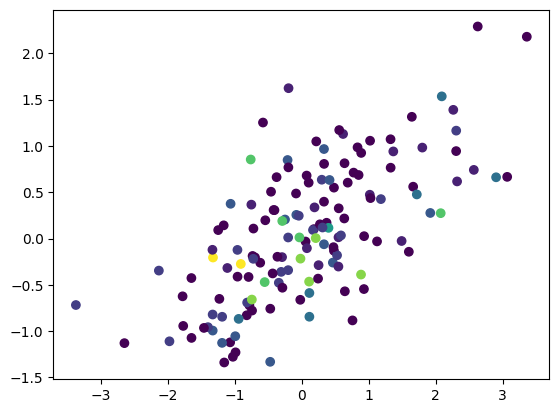

In [ ]:
plt.scatter(test_sc['NEEnogap_5day_sco2_ust'], test_sc['pred'], c=test_sc['na_count'])
plt.show()

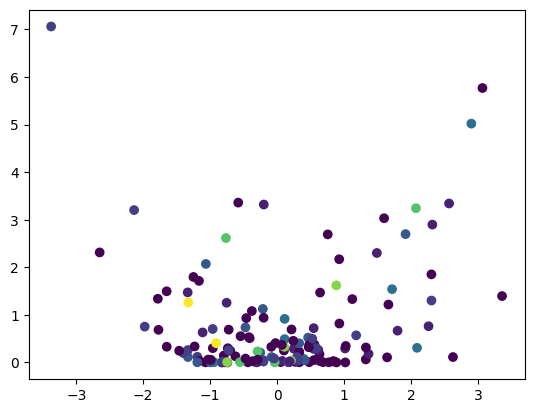

In [ ]:
plt.scatter(test_sc['NEEnogap_5day_sco2_ust'], np.abs(test_sc['pred'] - test_sc['NEEnogap_5day_sco2_ust'])**2, c=test_sc['na_count'])
plt.show()

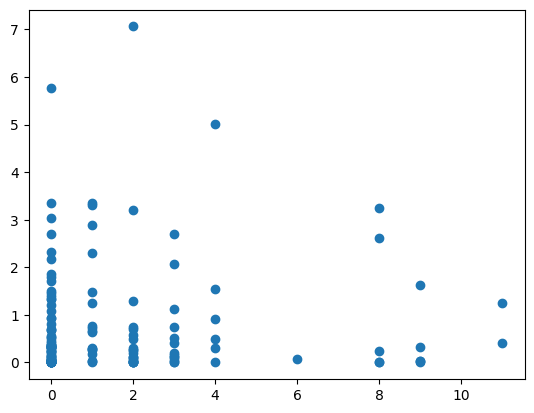

In [ ]:
plt.scatter(test_sc['na_count'], np.abs(test_sc['pred'] - test_sc['NEEnogap_5day_sco2_ust'])**2)
plt.show()

In [ ]:
test_sc['error'] = np.abs(test_sc['pred'] - test_sc['NEEnogap_5day_sco2_ust'])**2

In [ ]:
test_sc[['na_count', 'error']].groupby('na_count')['error'].mean()

na_count
0     0.646743
1     1.041686
2     0.741862
3     0.631273
4     1.380455
6     0.079936
8     1.219974
9     0.407565
11    0.832871
Name: error, dtype: float64

In [ ]:
test_sc[['na_count', 'error']].groupby('na_count')['error'].count()

na_count
0     73
1     18
2     21
3     13
4      6
6      1
8      5
9      5
11     2
Name: error, dtype: int64

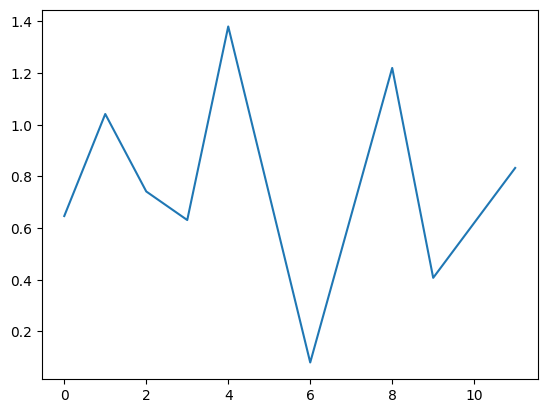

In [ ]:
plt.plot(test_sc[['na_count', 'error']].groupby('na_count')['error'].mean())
plt.show()